# plot Samples vs. Max Peak Correlation for all 16 subkeys

In [1]:
from tqdm.notebook import trange
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

peak_corr_1000 = np.fromfile("1000_peak_corr.bin", dtype=np.float64)
peak_corr_900 = np.fromfile("900_peak_corr.bin", dtype=np.float64)
peak_corr_800 = np.fromfile("800_peak_corr.bin", dtype=np.float64)
peak_corr_700 = np.fromfile("700_peak_corr.bin", dtype=np.float64)
peak_corr_600 = np.fromfile("600_peak_corr.bin", dtype=np.float64)
peak_corr_500 = np.fromfile("500_peak_corr.bin", dtype=np.float64)
peak_corr_400 = np.fromfile("400_peak_corr.bin", dtype=np.float64)
peak_corr_300 = np.fromfile("300_peak_corr.bin", dtype=np.float64)
peak_corr_200 = np.fromfile("200_peak_corr.bin", dtype=np.float64)
peak_corr_100 = np.fromfile("100_peak_corr.bin", dtype=np.float64)

In [2]:
peak_corr_1000

array([0.60825339, 0.72037   , 0.96477676, 0.71089985, 0.98886735,
       0.71298732, 0.8903022 , 0.97114436, 0.77061697, 0.95688763,
       0.96729868, 0.70851006, 0.90323542, 0.87384961, 0.87604336,
       0.85762761])

In [12]:
byte_list = []
for i in range (16):
    a = []
    a.append(peak_corr_1000[i])
    a.append(peak_corr_900[i])
    a.append(peak_corr_800[i])
    a.append(peak_corr_700[i])
    a.append(peak_corr_600[i])
    a.append(peak_corr_500[i])
    a.append(peak_corr_400[i])
    a.append(peak_corr_300[i])
    #a.append(peak_corr_200[i])
    #a.append(peak_corr_100[i])
    byte_list.append(a)

In [13]:
byte_list[4]

[0.9888673474512354,
 0.6865741410022254,
 0.8981761853497038,
 0.9430548353222429,
 0.9542369669927024,
 0.9519145173690577,
 0.6174515621756784,
 0.5986147863503776]

<Figure size 432x288 with 0 Axes>

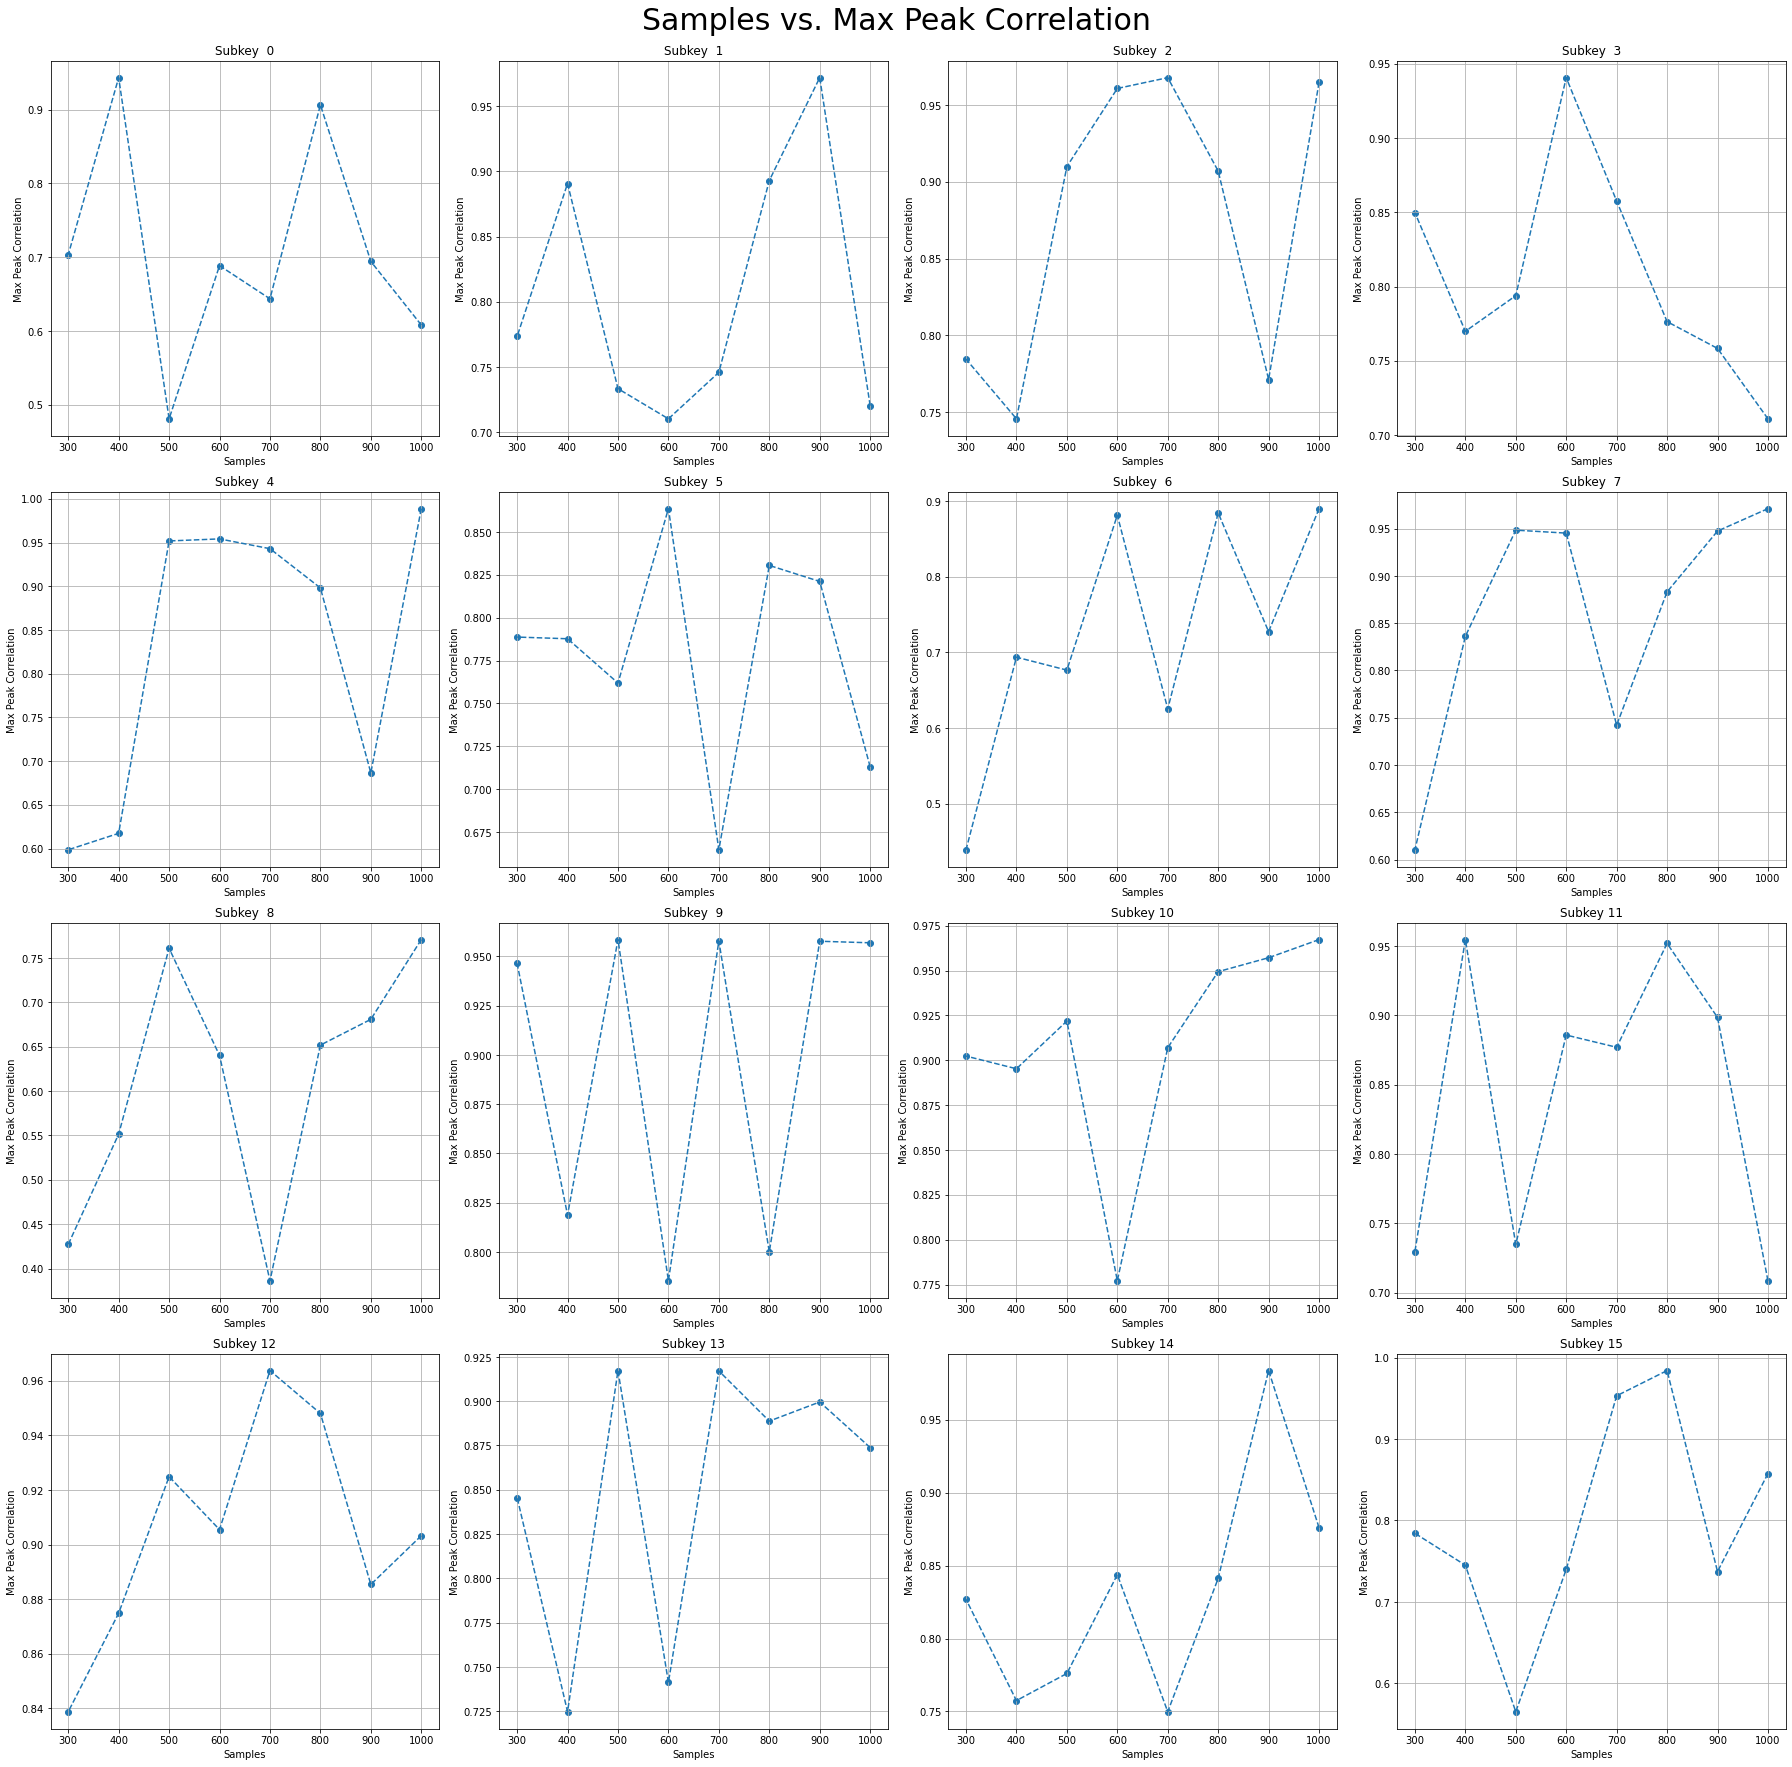

In [14]:
import pylab

import warnings  #ignore the subplot warmings of pylab.subplot(4,4,subkey+1)
warnings.filterwarnings('ignore')

plt.figure()

f, axs = plt.subplots(4,4,figsize=(25,25))  #making a 4x4 subplot, figsize 25x25

for subkey in range (16):
    pylab.subplot(4,4,subkey+1)  # marking the position of each subplot
    x = [1000,900,800,700,600,500,400,300]
    y = byte_list[subkey]  
    plt.grid()
    plt.scatter(x,y) 
    plt.plot(x, y,'--')
    plt.xlabel('Samples')
    plt.ylabel('Max Peak Correlation')
    plt.title('Subkey %2d' %(subkey))
        
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Samples vs. Max Peak Correlation', size=30)

plt.savefig('tests_vs_peaks.jpg',dpi=200)  
            
plt.show()

# plot correct corr and the noise corr

In [1]:
from tqdm.notebook import trange
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

peak_corr_1000 = np.split(np.fromfile("1s1cc_correct_peak.bin", dtype=np.float64), 16)
peak_corr_900 = np.split(np.fromfile("1s2cc_correct_peak.bin", dtype=np.float64), 16)
peak_corr_800 = np.split(np.fromfile("1s3cc_correct_peak.bin", dtype=np.float64), 16)
peak_corr_700 = np.split(np.fromfile("1s4cc_correct_peak.bin", dtype=np.float64), 16)
peak_corr_64scc = np.split(np.fromfile("regular_HD_correct_peak.bin", dtype=np.float64), 16)

niose_corr_1000 = np.split(np.fromfile("1s1cc_noise.bin", dtype=np.float64), 16)
niose_corr_900 = np.split(np.fromfile("1s2cc_noise.bin", dtype=np.float64), 16)
niose_corr_800 = np.split(np.fromfile("1s3cc_noise.bin", dtype=np.float64), 16)
niose_corr_700 = np.split(np.fromfile("1s4cc_noise.bin", dtype=np.float64), 16)
niose_corr_64scc = np.split(np.fromfile("regular_HD_noise.bin", dtype=np.float64), 16)

In [2]:
print(len(peak_corr_1000))
print(len(peak_corr_1000[0]))
print(len(niose_corr_1000))
print(len(niose_corr_1000[0]))

16
20
16
20


In [5]:
all_byte_subset_plot = []
for byte in range (16):
    trace_list = []
    for subset in range (len(peak_corr_1000[0])):
        trace_list.append(peak_corr_700[byte][subset])
        trace_list.append(peak_corr_800[byte][subset])
        trace_list.append(peak_corr_900[byte][subset])
        trace_list.append(peak_corr_1000[byte][subset])
        trace_list.append(peak_corr_64scc[byte][subset])
    trace_array = np.array(trace_list)
    trace_array_plot = np.split(trace_array,20)
    all_byte_subset_plot.append(trace_array_plot)

In [6]:
noise_byte_subset_plot = []
for byte in range (16):
    noise_trace_list = []
    for subset in range (len(niose_corr_1000[0])):
        noise_trace_list.append(niose_corr_700[byte][subset])
        noise_trace_list.append(niose_corr_800[byte][subset])
        noise_trace_list.append(niose_corr_900[byte][subset])
        noise_trace_list.append(niose_corr_1000[byte][subset])
        noise_trace_list.append(niose_corr_64scc[byte][subset])
    noise_trace_array = np.array(noise_trace_list)
    noise_trace_array_plot = np.split(noise_trace_array,20)
    noise_byte_subset_plot.append(noise_trace_array_plot)

In [7]:
print(len(all_byte_subset_plot))
print(len(all_byte_subset_plot[0]))
print(len(all_byte_subset_plot[0][0]))

16
20
5


<Figure size 432x288 with 0 Axes>

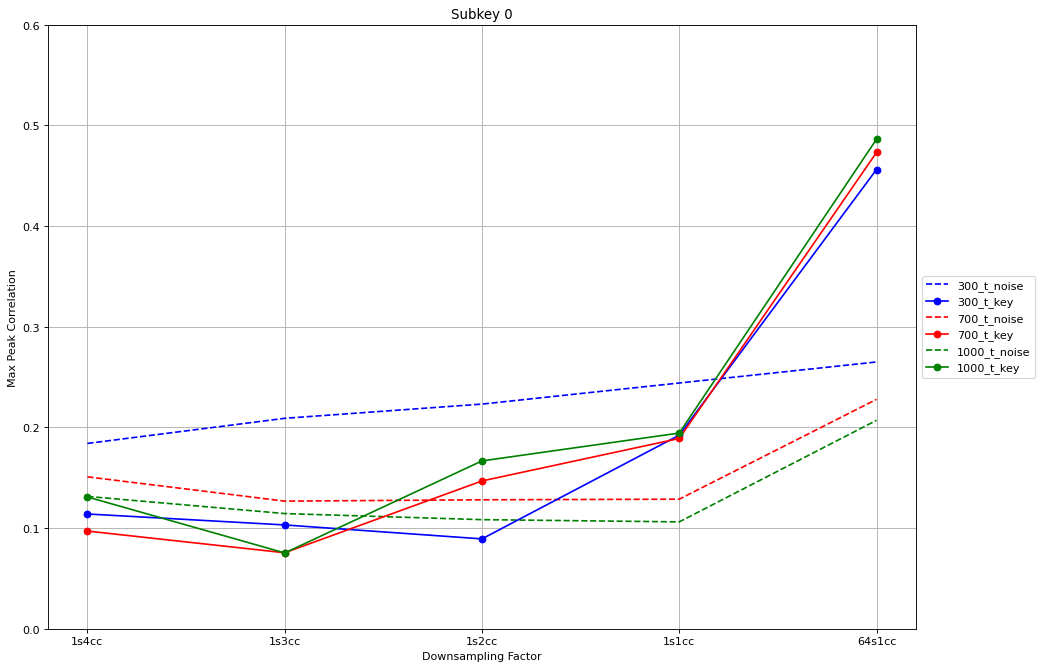

In [12]:
from matplotlib.pyplot import figure
label_legend = np.arange(50, 1050, 50)
x = ['1s4cc','1s3cc','1s2cc','1s1cc','64s1cc']
color_order = ['blue','red','green','orange']

plt.figure()
figure(figsize=(14, 10), dpi=80)
a = 0
for i in (5,13,19):
    y = noise_byte_subset_plot[0][i] 
    plt.plot(x, y,'--',color = color_order[a],label='%2d_t_noise'%(label_legend[i]))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    y = all_byte_subset_plot[0][i] 
    plt.plot(x, y,'o-',color = color_order[a],zorder = 255,label='%2d_t_key'%(label_legend[i]))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    a+=1

plt.grid()
plt.ylim((0,0.6))
plt.xlabel('Downsampling Factor')
plt.ylabel('Max Peak Correlation')
plt.title('Subkey 0')

plt.show()

<Figure size 432x288 with 0 Axes>

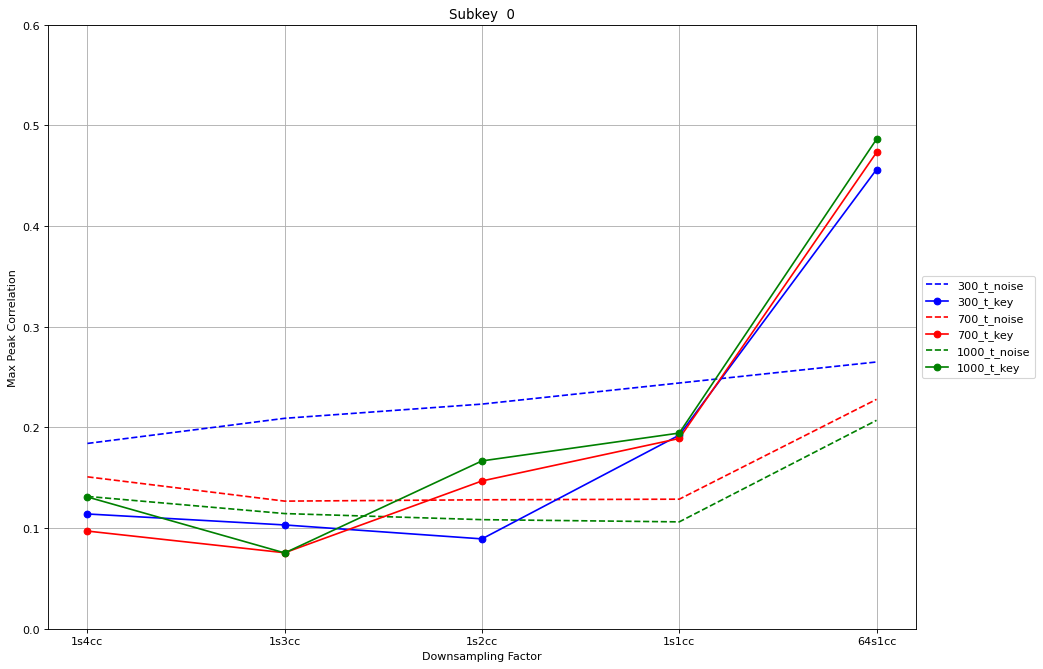

<Figure size 432x288 with 0 Axes>

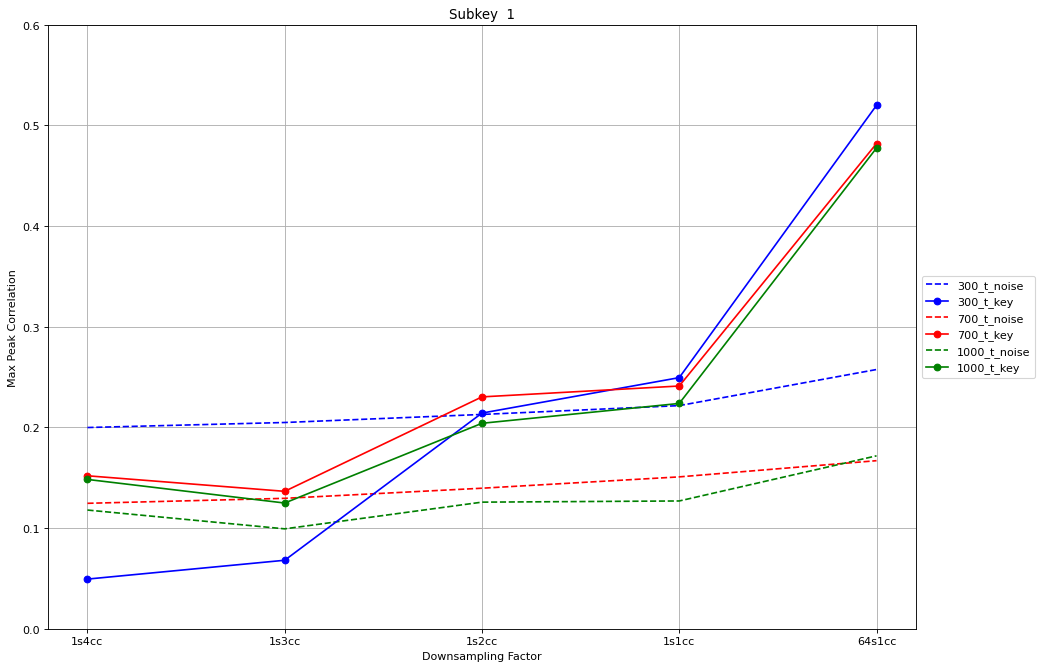

<Figure size 432x288 with 0 Axes>

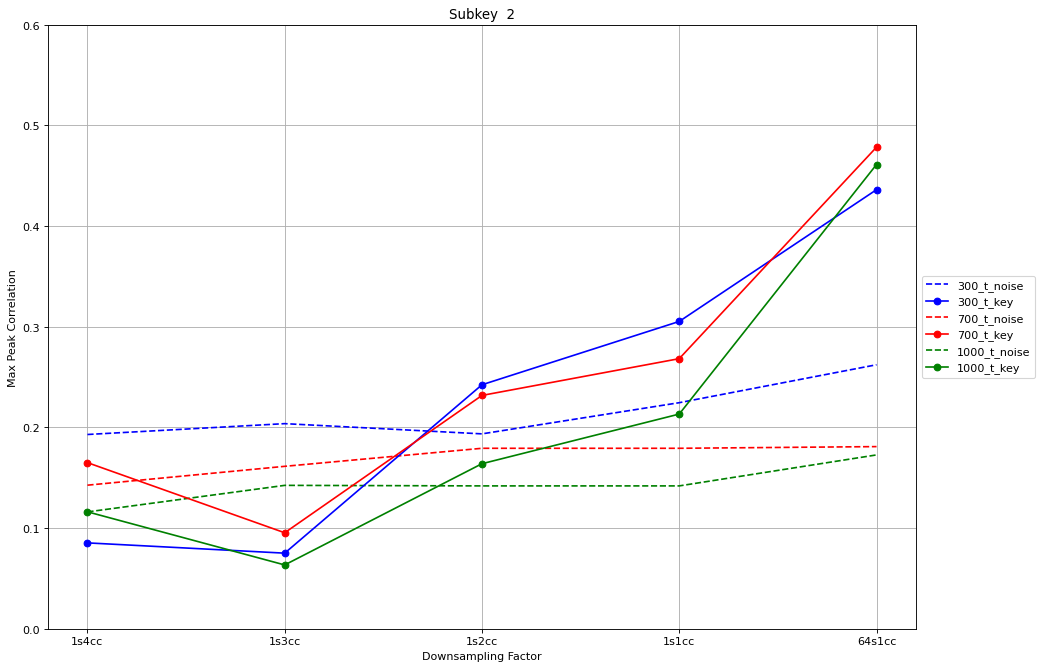

<Figure size 432x288 with 0 Axes>

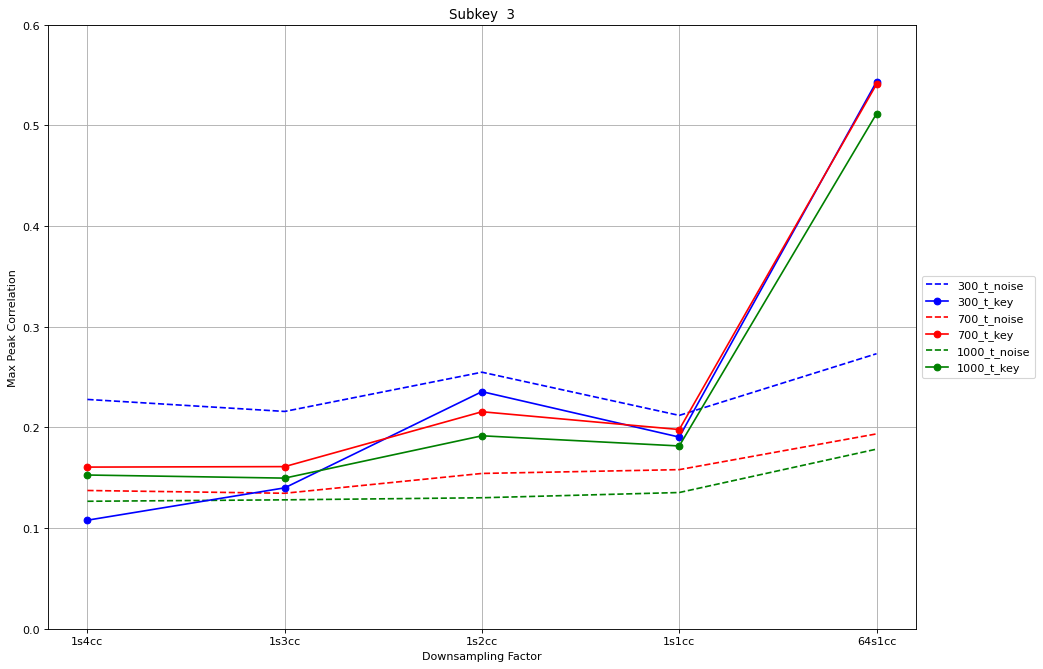

<Figure size 432x288 with 0 Axes>

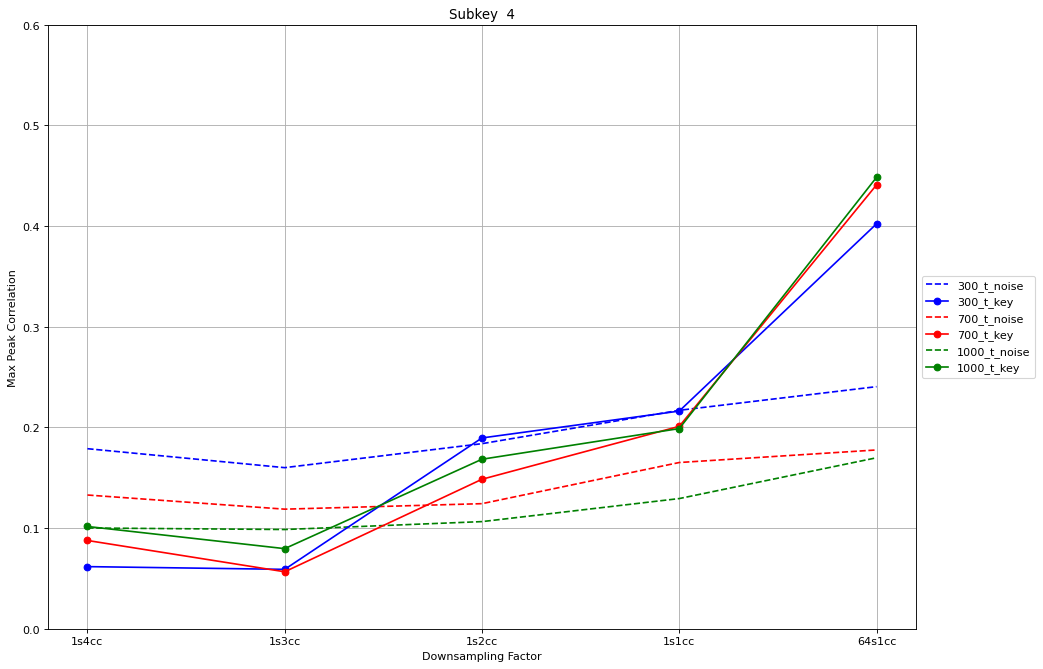

<Figure size 432x288 with 0 Axes>

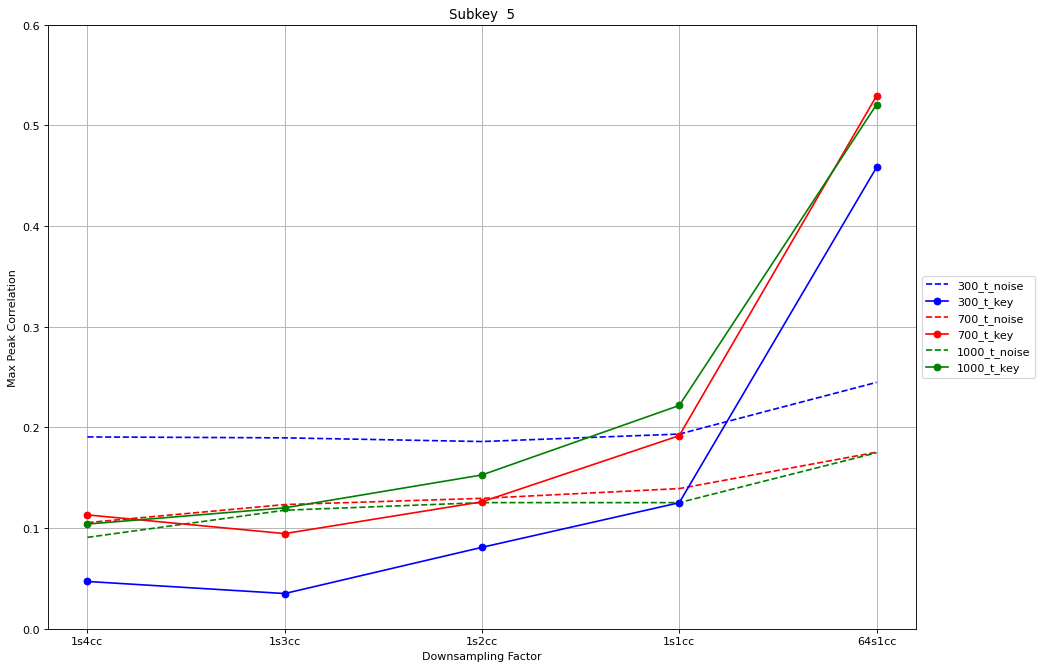

<Figure size 432x288 with 0 Axes>

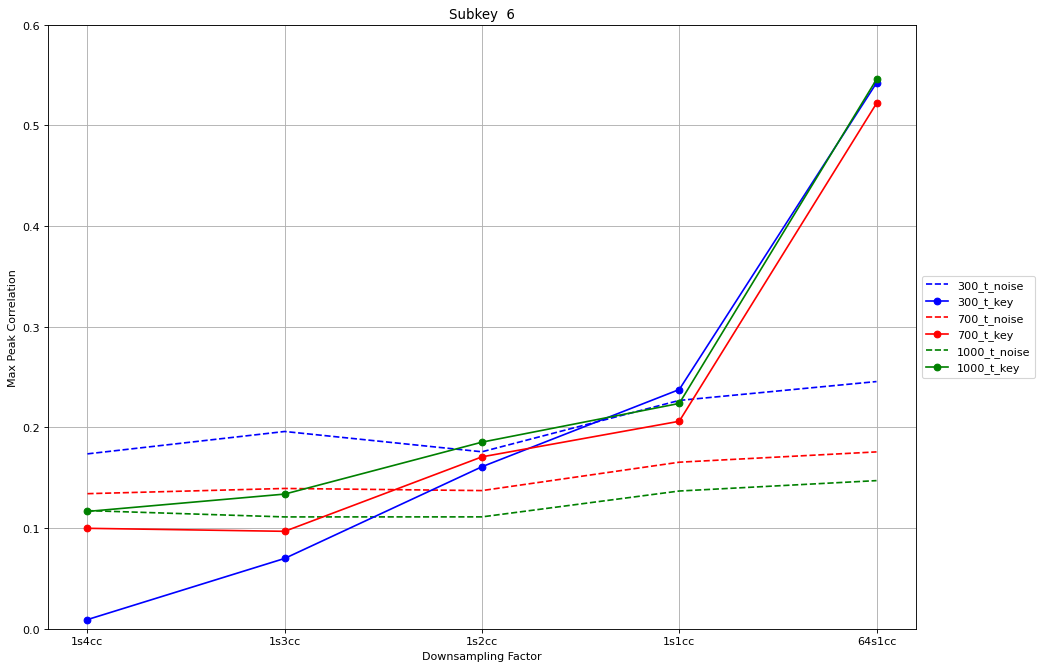

<Figure size 432x288 with 0 Axes>

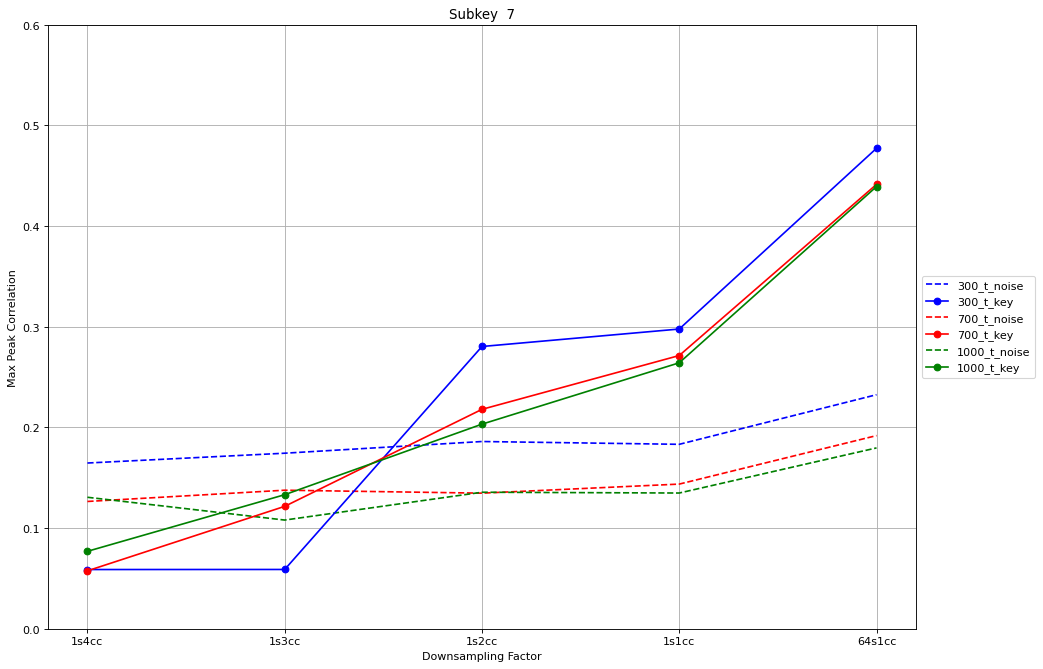

<Figure size 432x288 with 0 Axes>

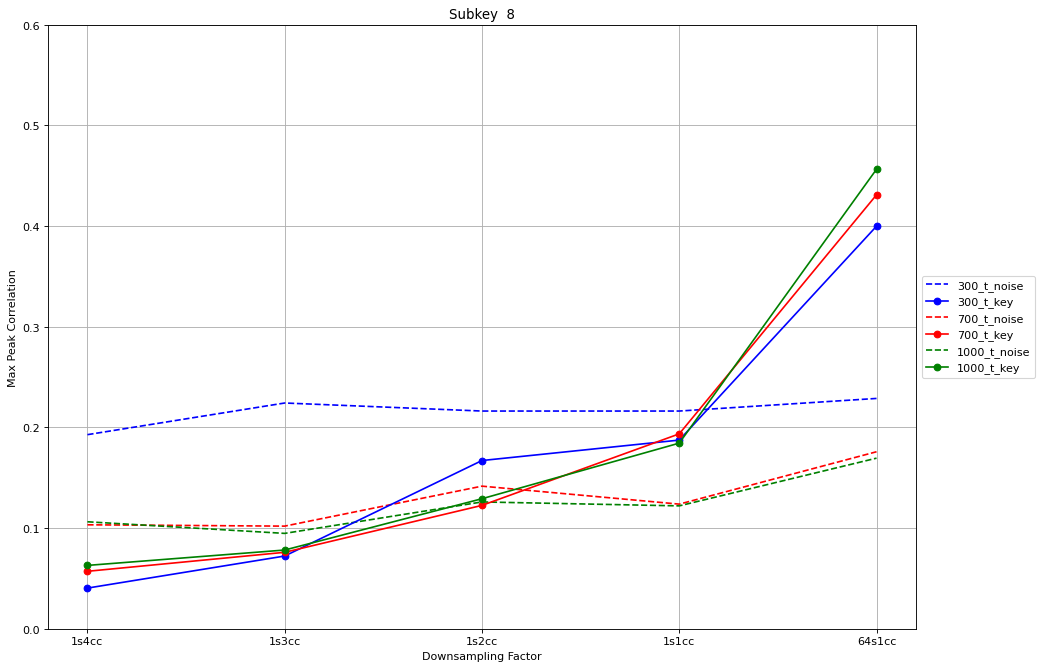

<Figure size 432x288 with 0 Axes>

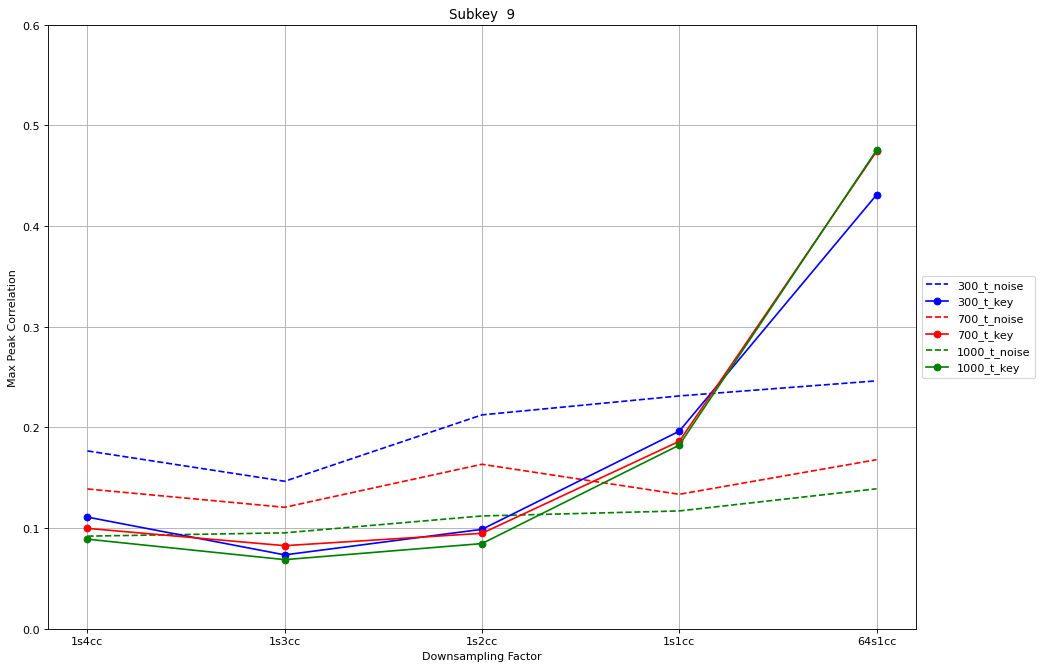

<Figure size 432x288 with 0 Axes>

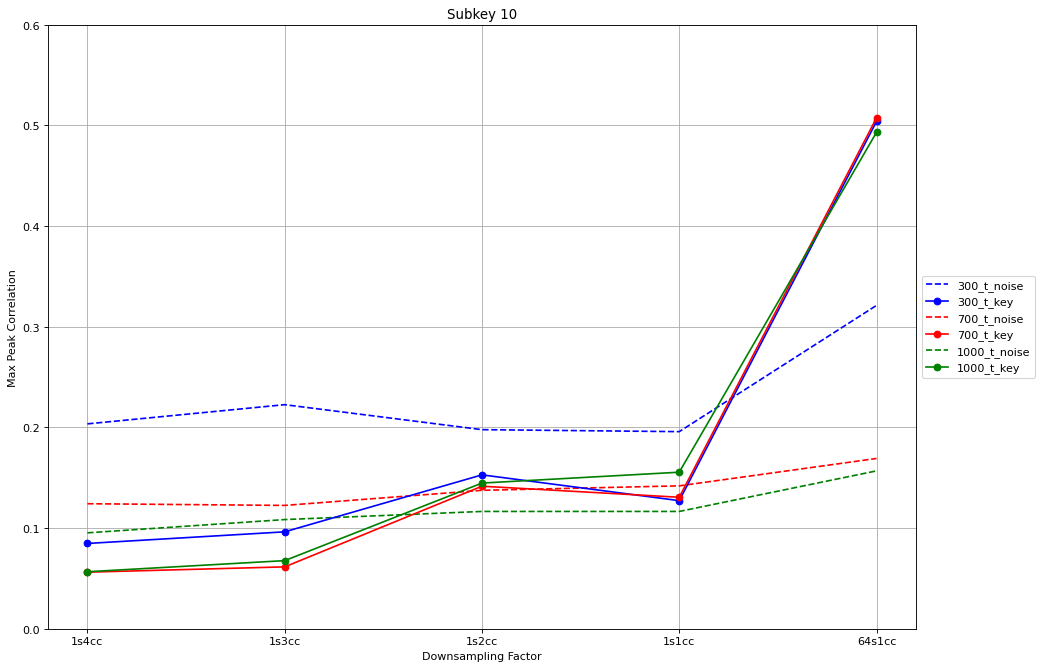

<Figure size 432x288 with 0 Axes>

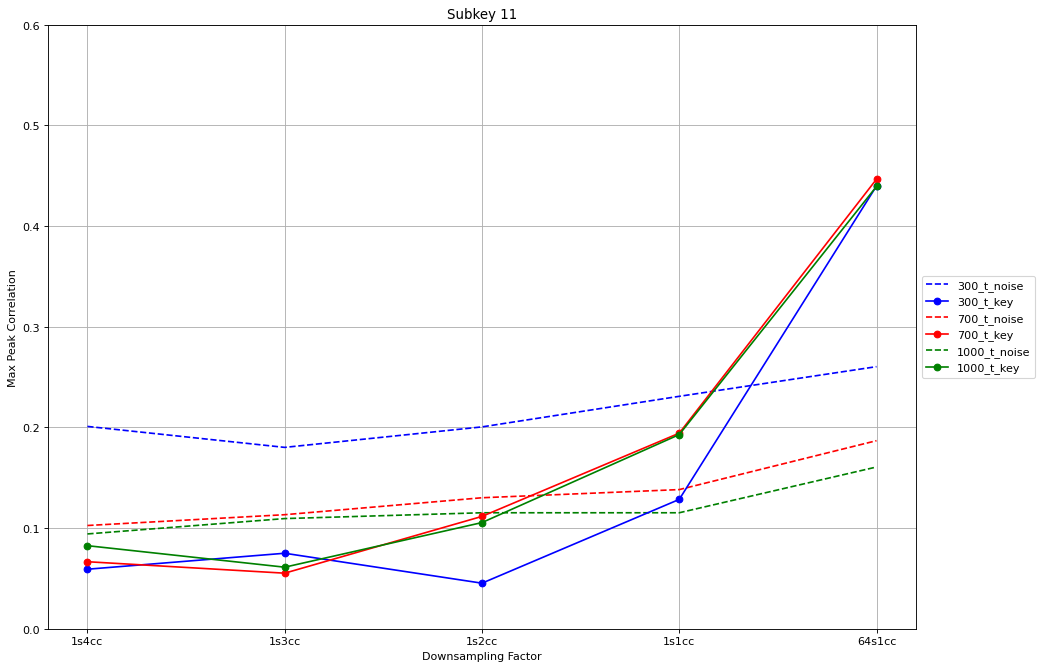

<Figure size 432x288 with 0 Axes>

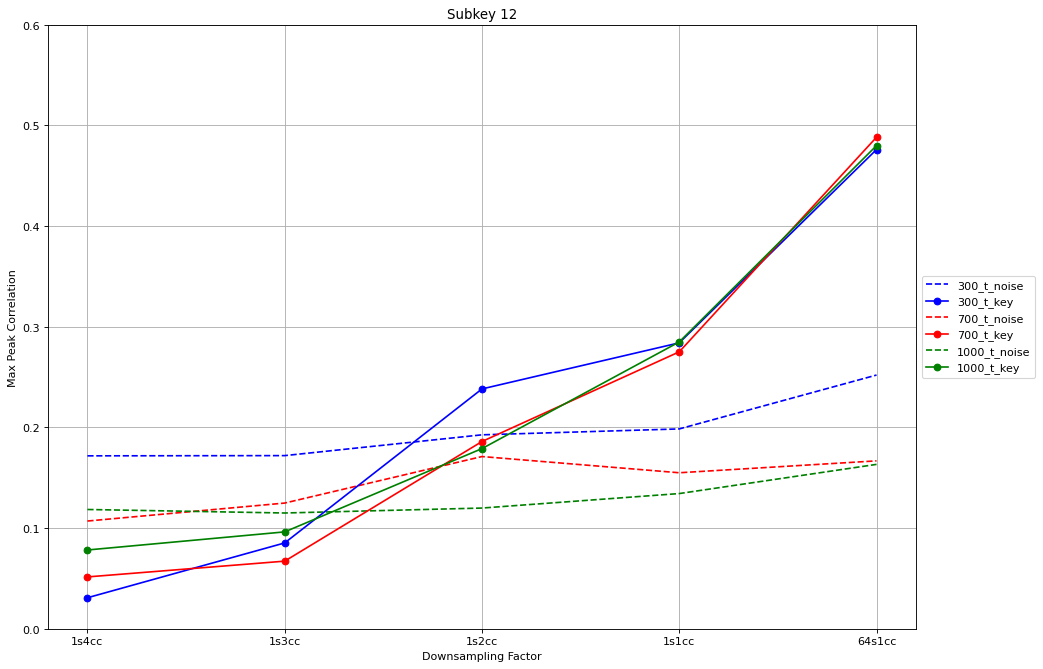

<Figure size 432x288 with 0 Axes>

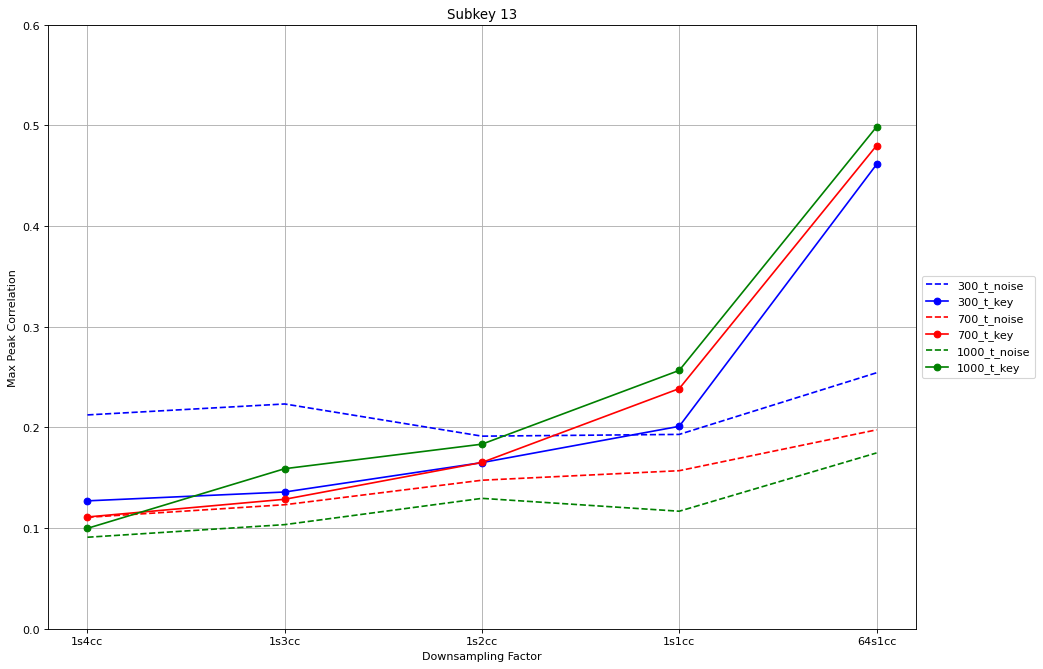

<Figure size 432x288 with 0 Axes>

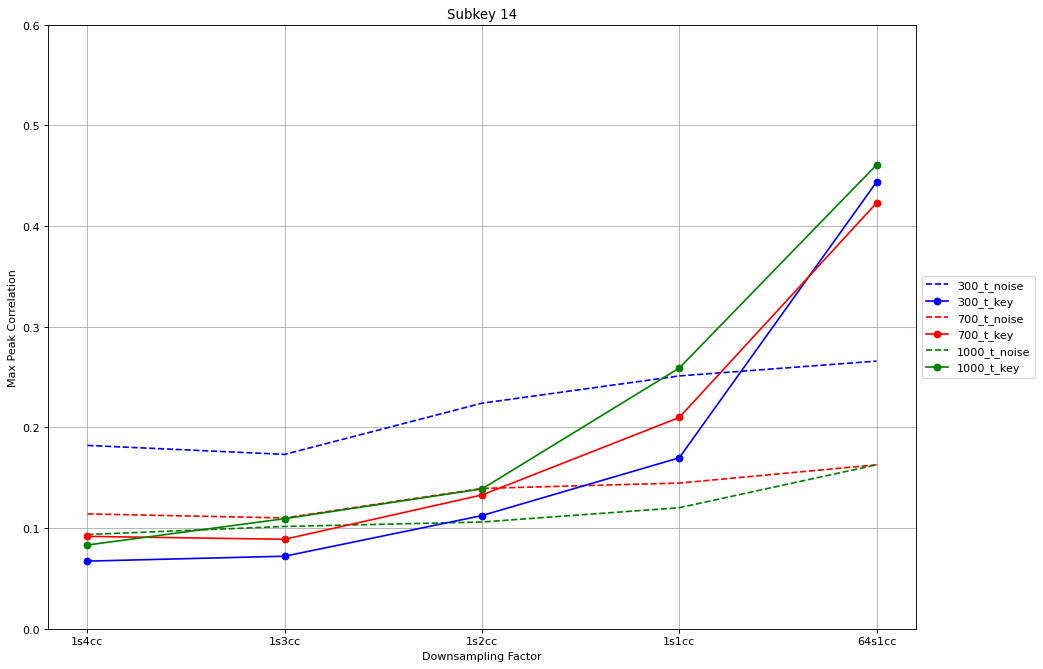

<Figure size 432x288 with 0 Axes>

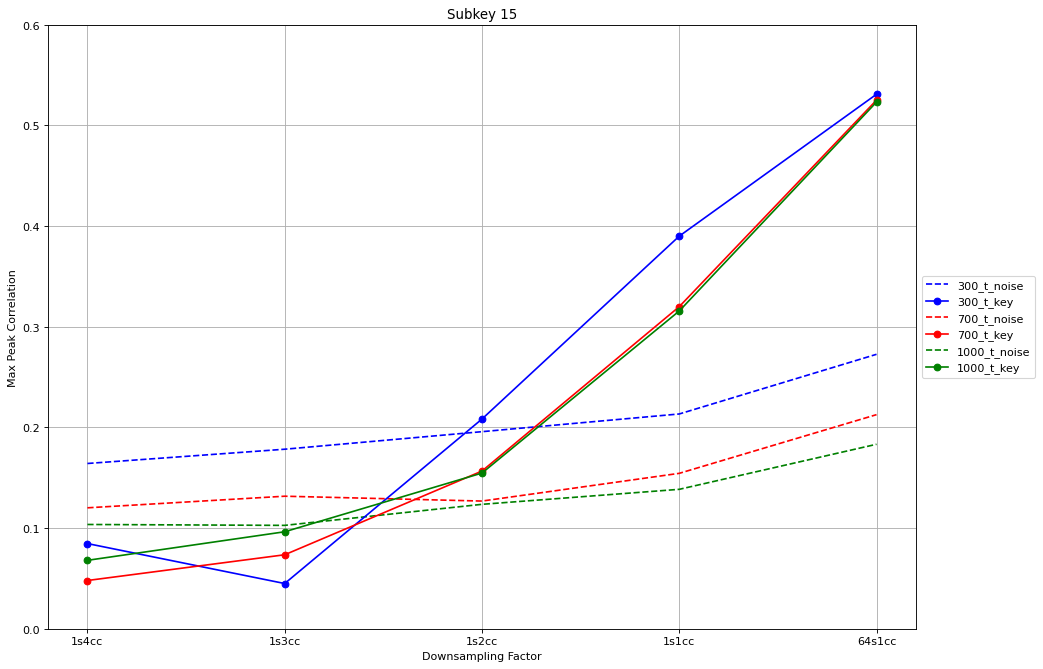

In [13]:
for subkey in range (16):
    
    plt.figure()
    figure(figsize=(14, 10), dpi=80)

    a = 0
    for i in (5,13,19):
        y = noise_byte_subset_plot[subkey][i] 
        plt.plot(x, y,'--',color = color_order[a],label='%2d_t_noise'%(label_legend[i]))
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        y = all_byte_subset_plot[subkey][i] 
        plt.plot(x, y,'o-',color = color_order[a],zorder = 255,label='%2d_t_key'%(label_legend[i]))
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        a+=1

    plt.grid()
    plt.ylim((0,0.6))
    plt.xlabel('Downsampling Factor')
    plt.ylabel('Max Peak Correlation')
    plt.title('Subkey %2d' %(subkey))

    plt.show()
    
    #plt.savefig('Subkey %2d corr.jpg'%(subkey),dpi=300)

    plt.show()

<Figure size 432x288 with 0 Axes>

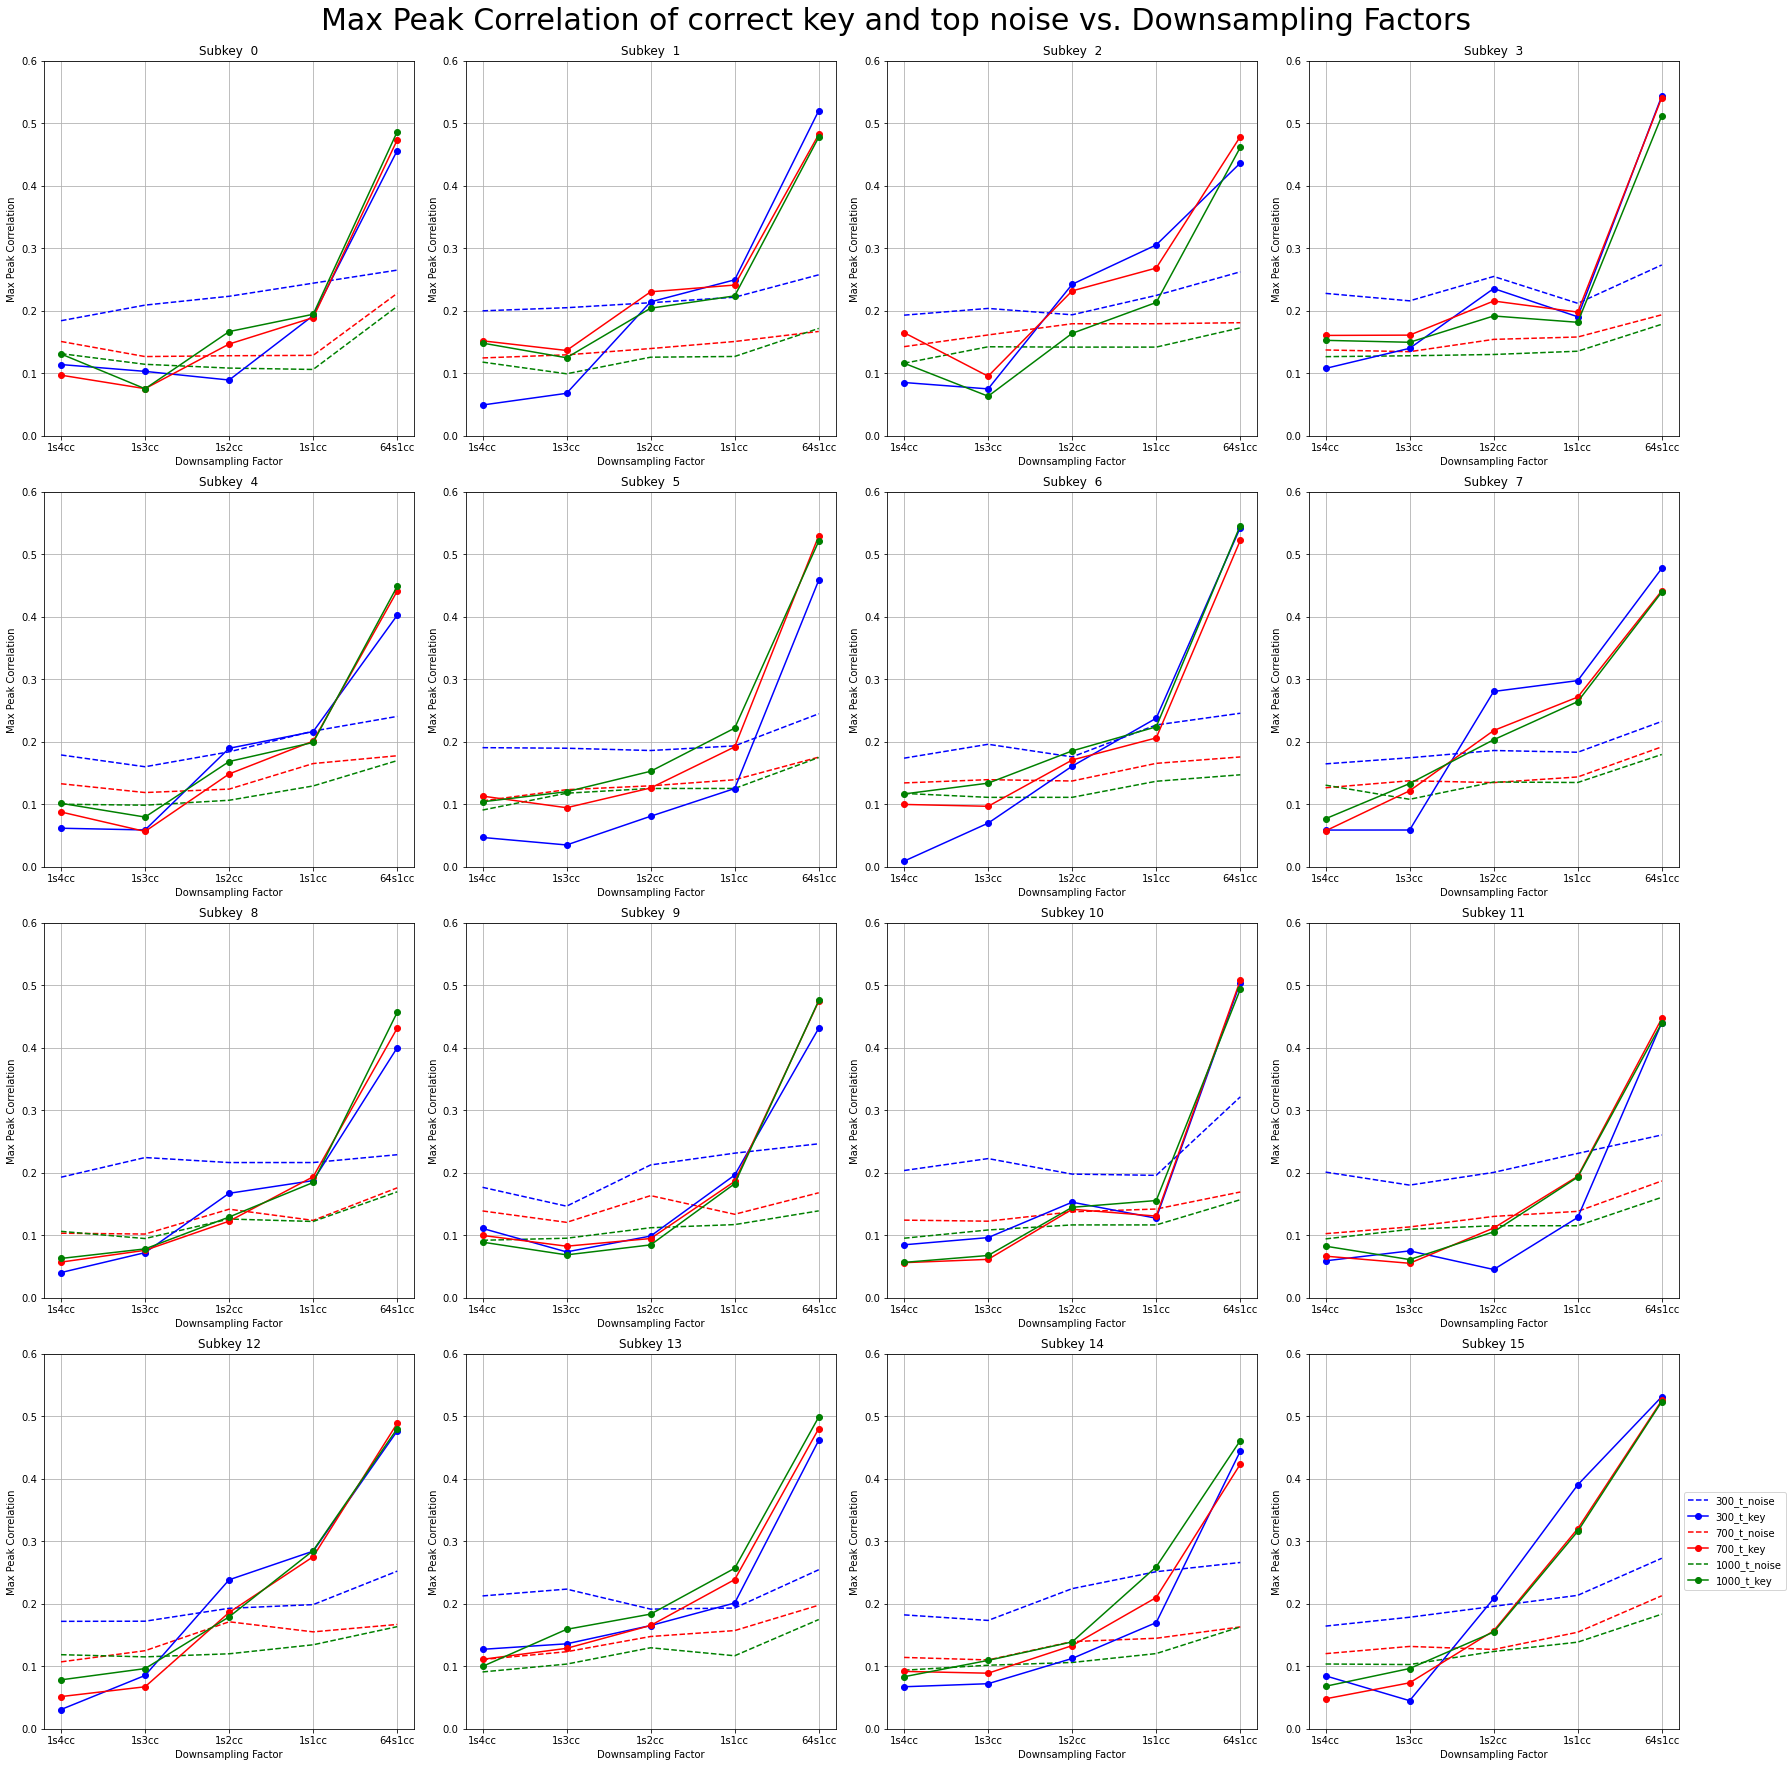

In [21]:
import pylab
plt.figure()
f, axs = plt.subplots(4,4,figsize=(25,25))
value = 1
for subkey in range (16):
    pylab.subplot(4,4,value)
        
    a = 0
    for i in (5,13,19):
        y = noise_byte_subset_plot[subkey][i] 
        plt.plot(x, y,'--',color = color_order[a],label='%2d_t_noise'%(label_legend[i]))

        y = all_byte_subset_plot[subkey][i] 
        plt.plot(x, y,'o-',color = color_order[a],zorder = 255,label='%2d_t_key'%(label_legend[i]))

        a+=1

    value += 1
    
    plt.grid()
    plt.ylim((0,0.6))
    plt.xticks(x)
        
    plt.title('Subkey %2d' %(subkey))
    plt.xlabel('Downsampling Factor')
    plt.ylabel('Max Peak Correlation')
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Max Peak Correlation of correct key and top noise vs. Downsampling Factors', size=30)

plt.savefig('all subkeys corr.jpg',dpi=300)

plt.show()

# plot differences between the correct corr and the top wrong corr

<Figure size 432x288 with 0 Axes>

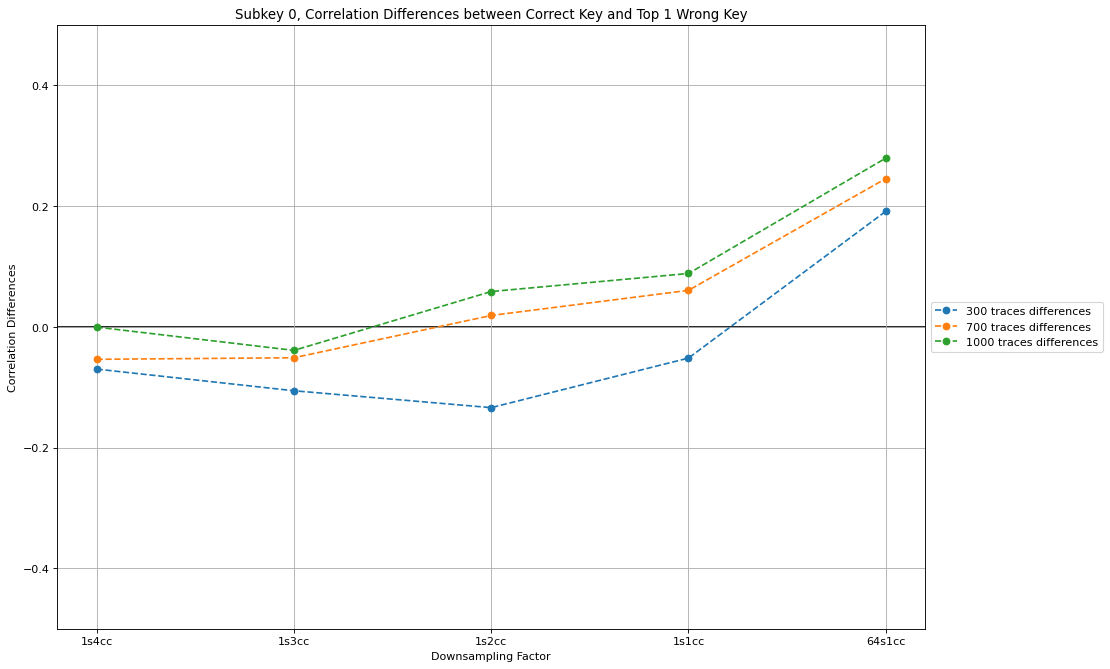

In [16]:
plt.figure()
figure(figsize=(14, 10), dpi=80)

plt.axhline(y=0, color='black', linestyle='-',zorder = 0,)
    
for i in (5,13,19):
    y = all_byte_subset_plot[0][i] - noise_byte_subset_plot[0][i] 
    plt.plot(x, y,'o--',label='%2d traces differences'%(label_legend[i]))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid()
plt.ylim((-0.5,0.5))
plt.xlabel('Downsampling Factor')
plt.ylabel('Correlation Differences')
plt.title('Subkey 0, Correlation Differences between Correct Key and Top 1 Wrong Key')

plt.show()

<Figure size 432x288 with 0 Axes>

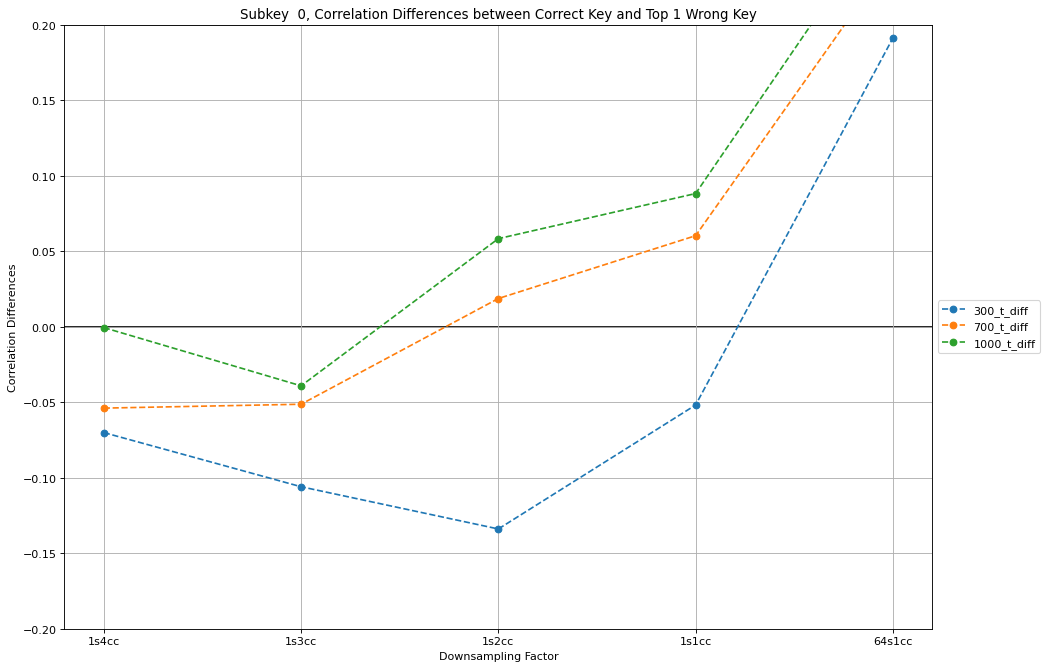

<Figure size 432x288 with 0 Axes>

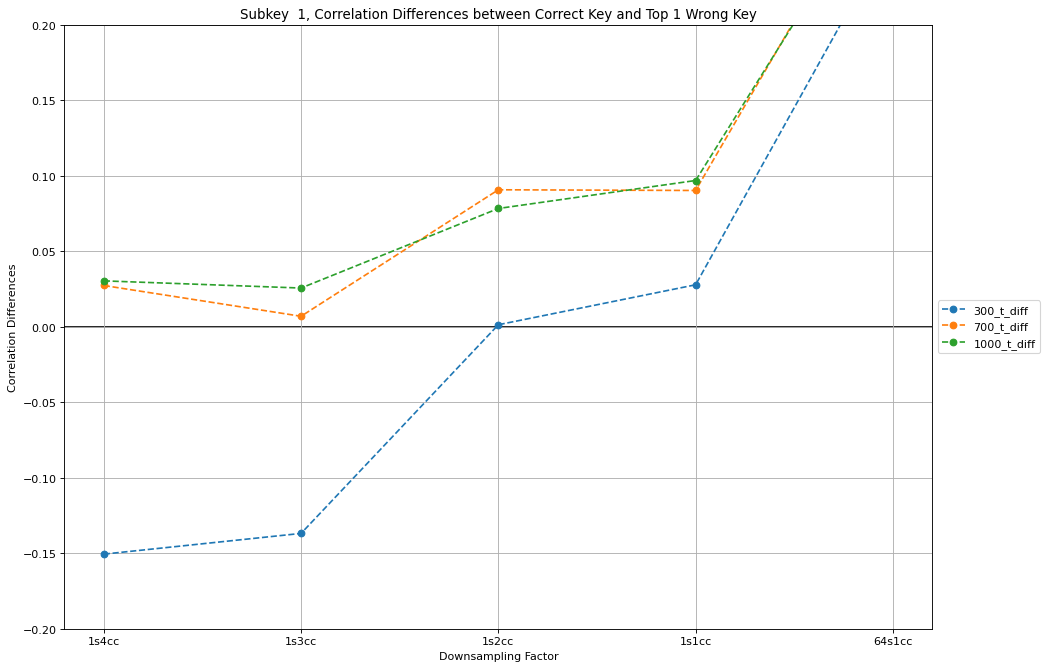

<Figure size 432x288 with 0 Axes>

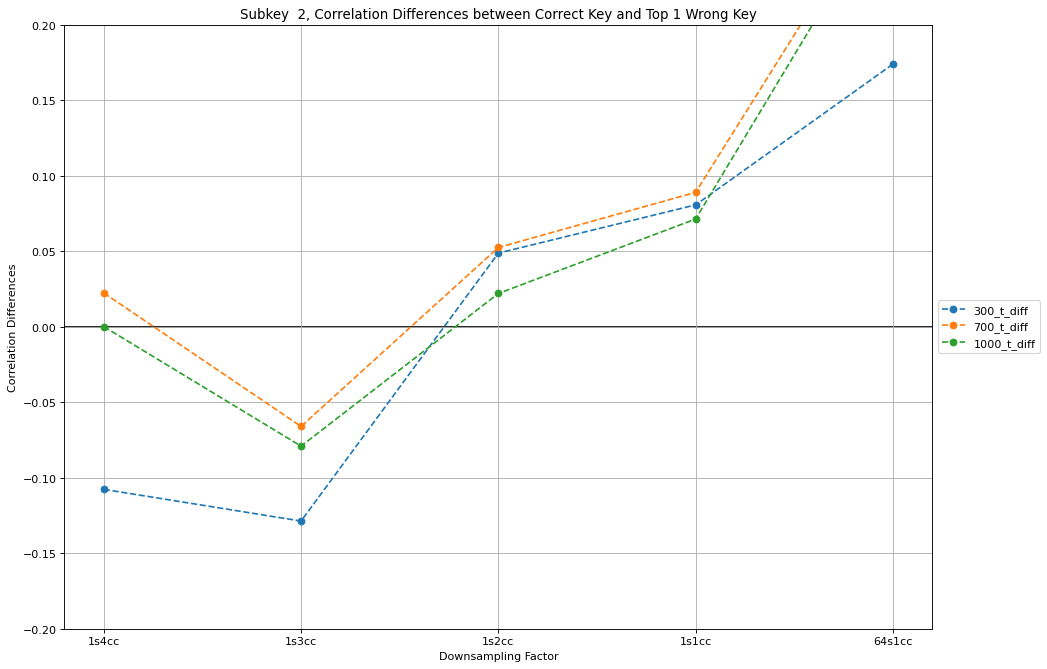

<Figure size 432x288 with 0 Axes>

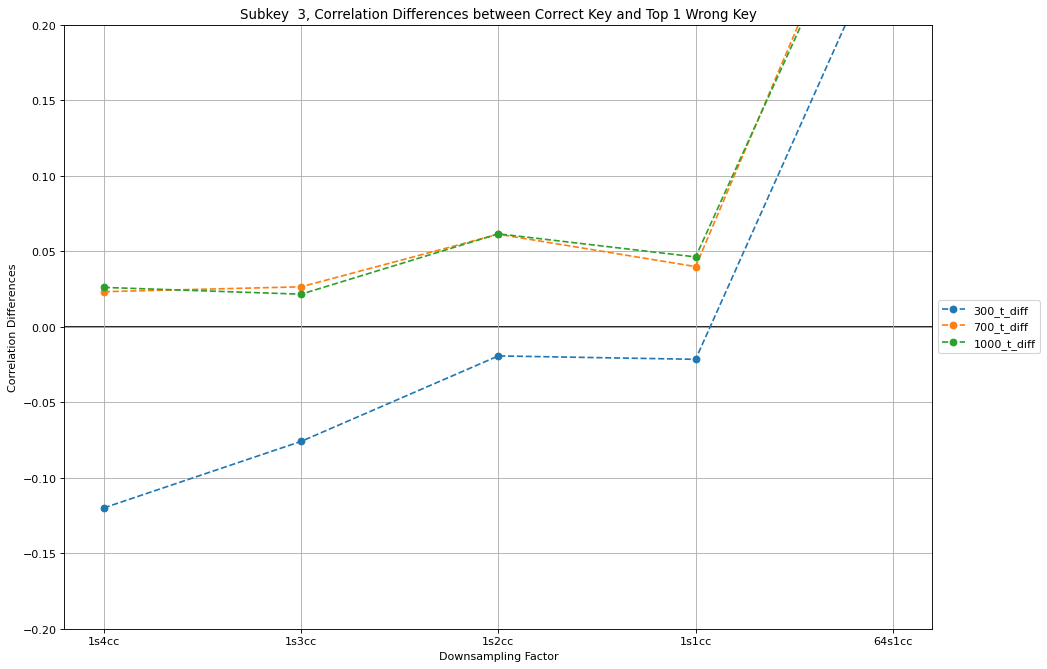

<Figure size 432x288 with 0 Axes>

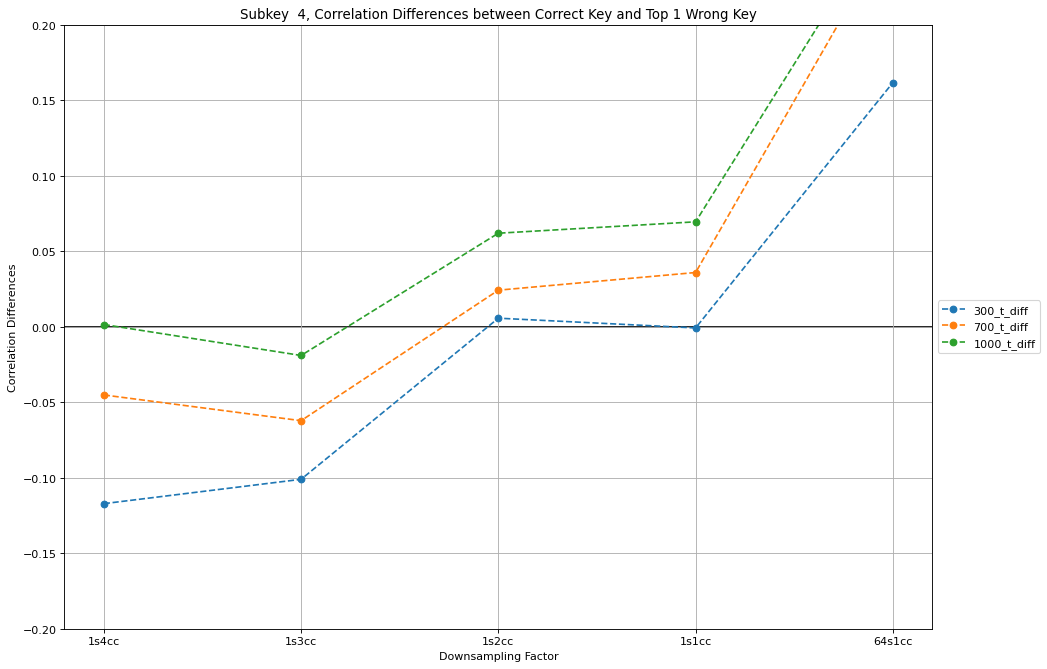

<Figure size 432x288 with 0 Axes>

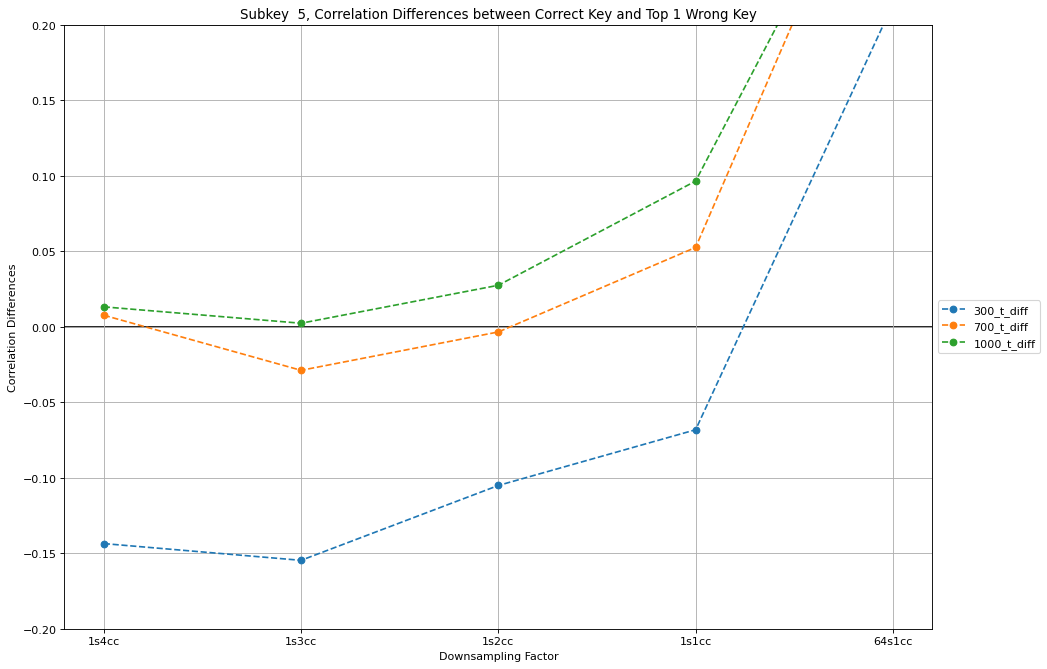

<Figure size 432x288 with 0 Axes>

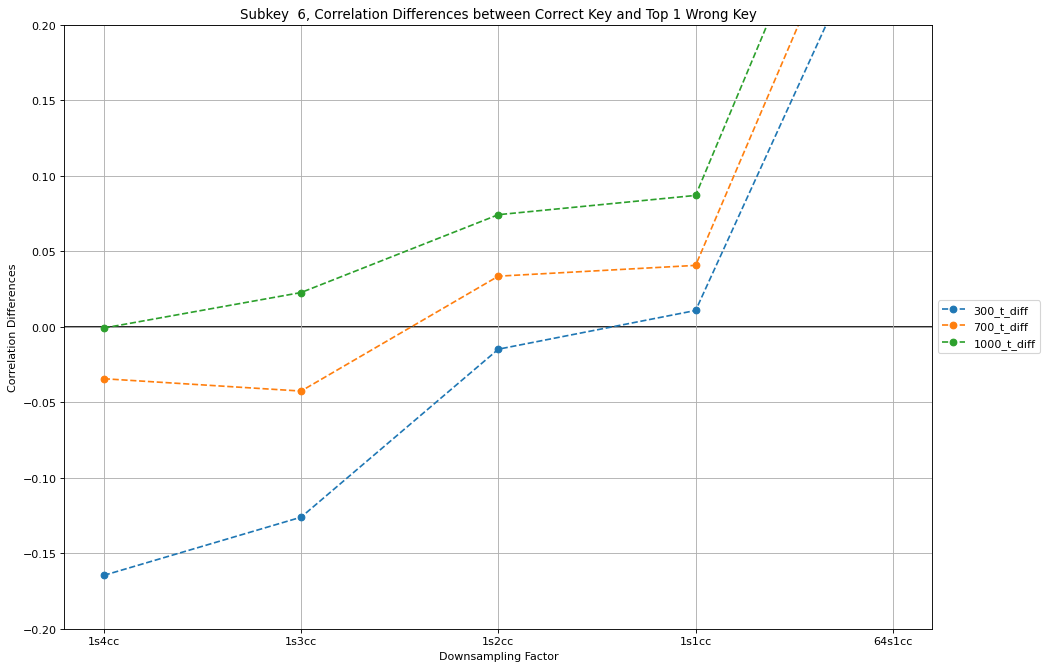

<Figure size 432x288 with 0 Axes>

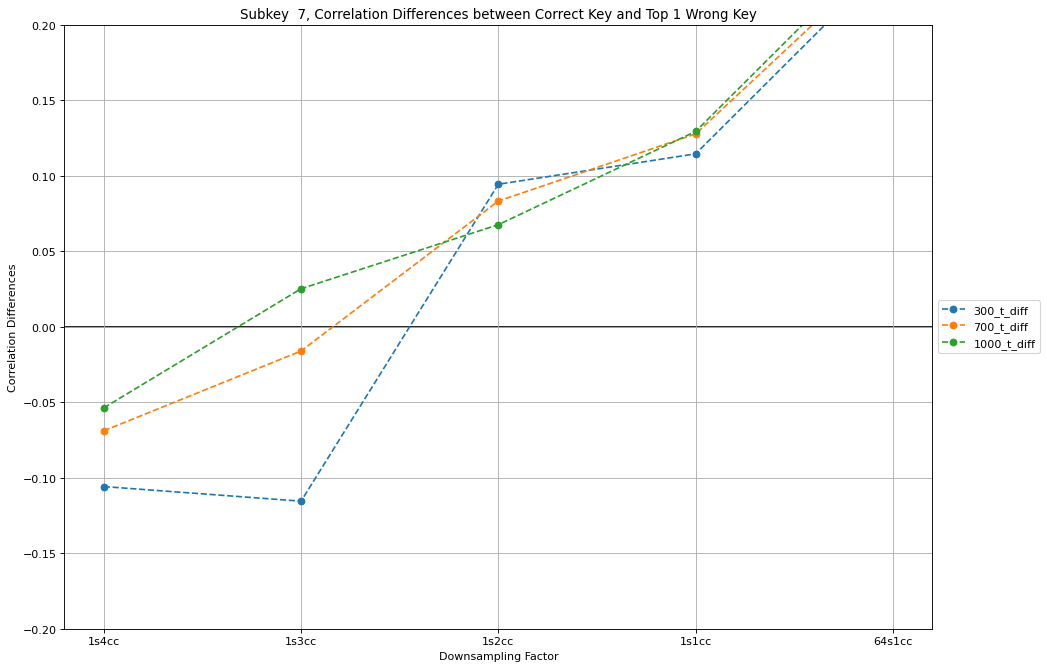

<Figure size 432x288 with 0 Axes>

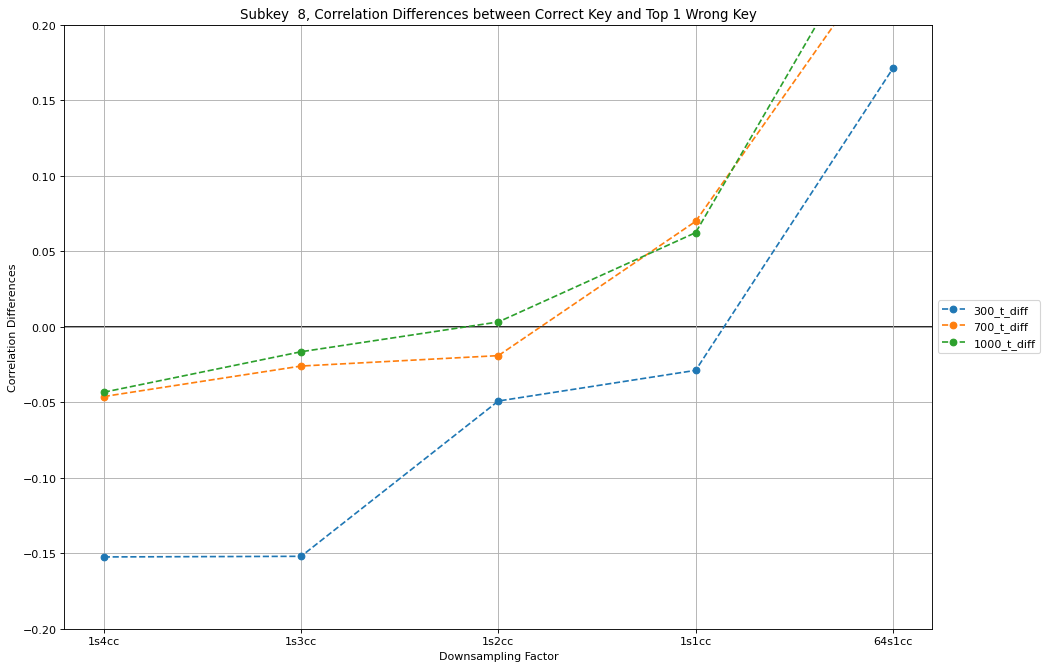

<Figure size 432x288 with 0 Axes>

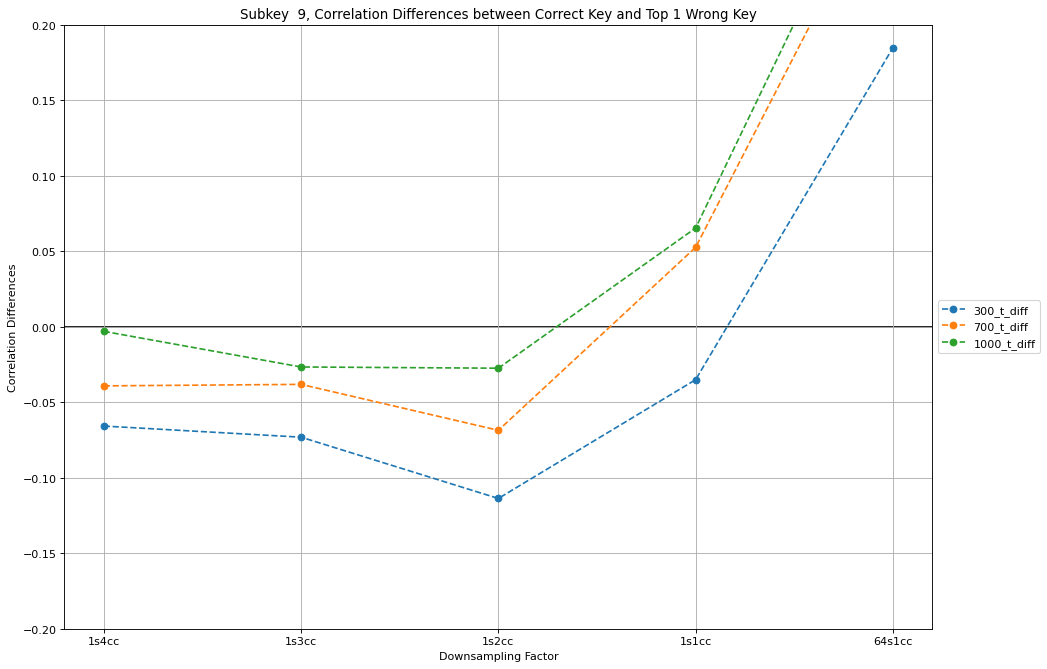

<Figure size 432x288 with 0 Axes>

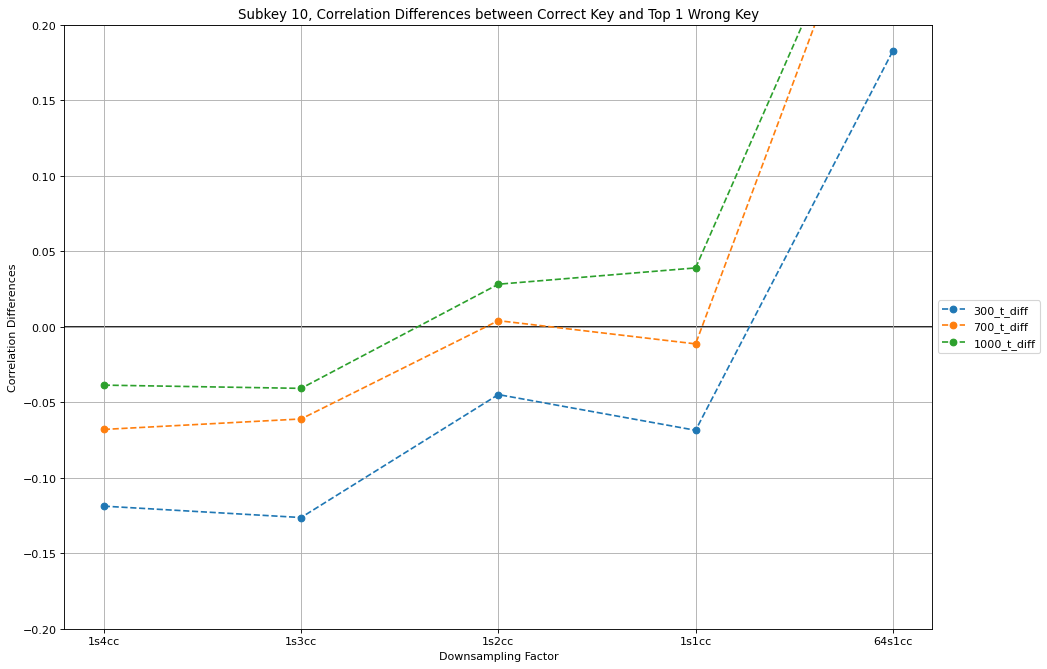

<Figure size 432x288 with 0 Axes>

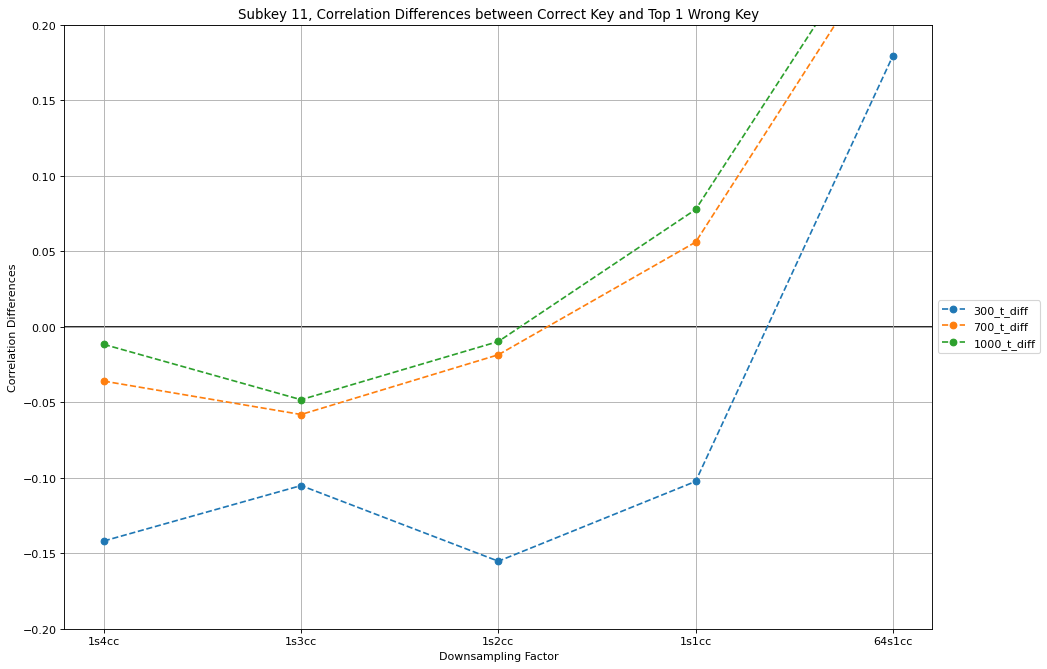

<Figure size 432x288 with 0 Axes>

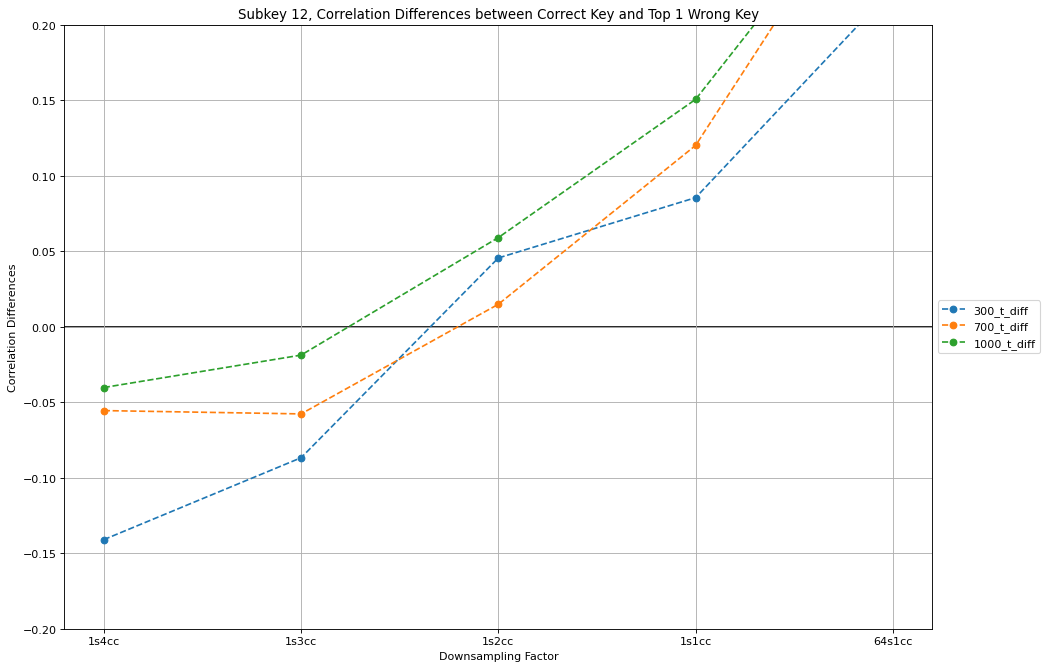

<Figure size 432x288 with 0 Axes>

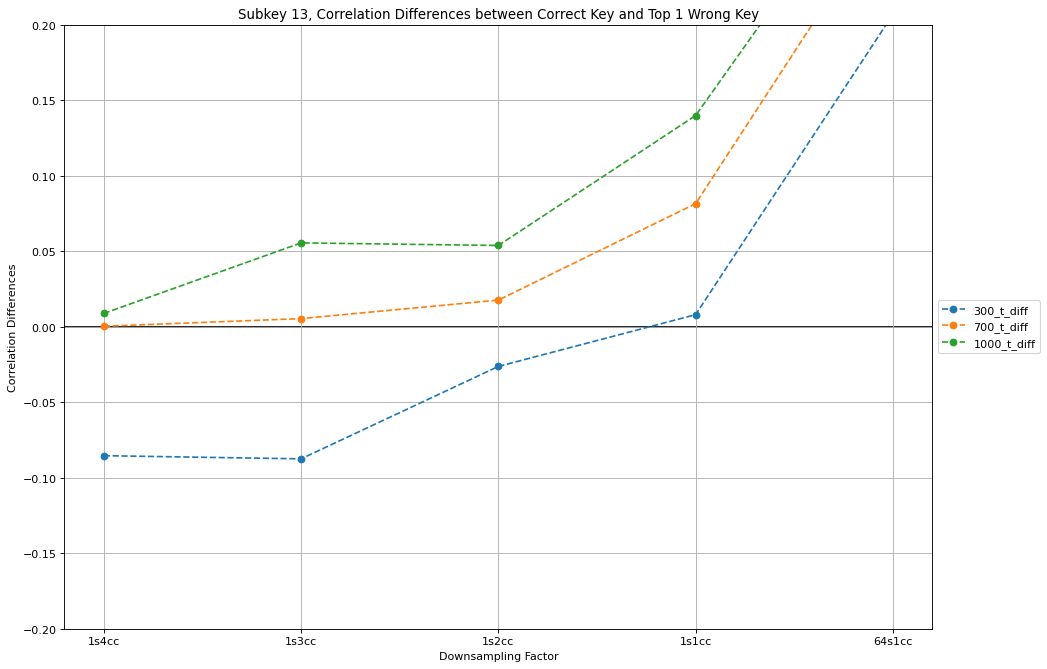

<Figure size 432x288 with 0 Axes>

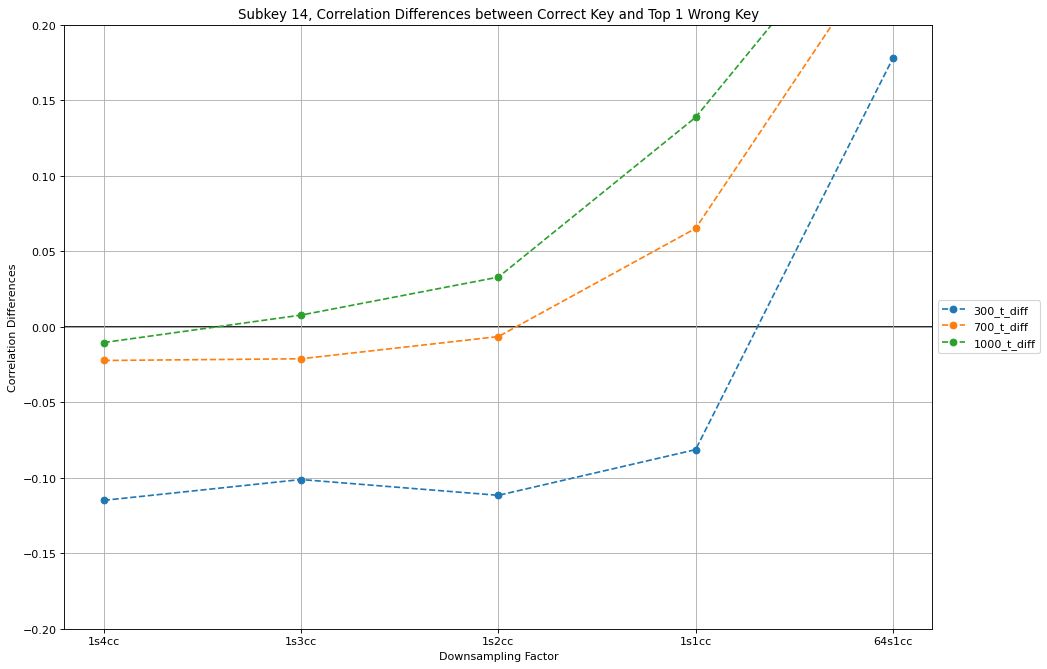

<Figure size 432x288 with 0 Axes>

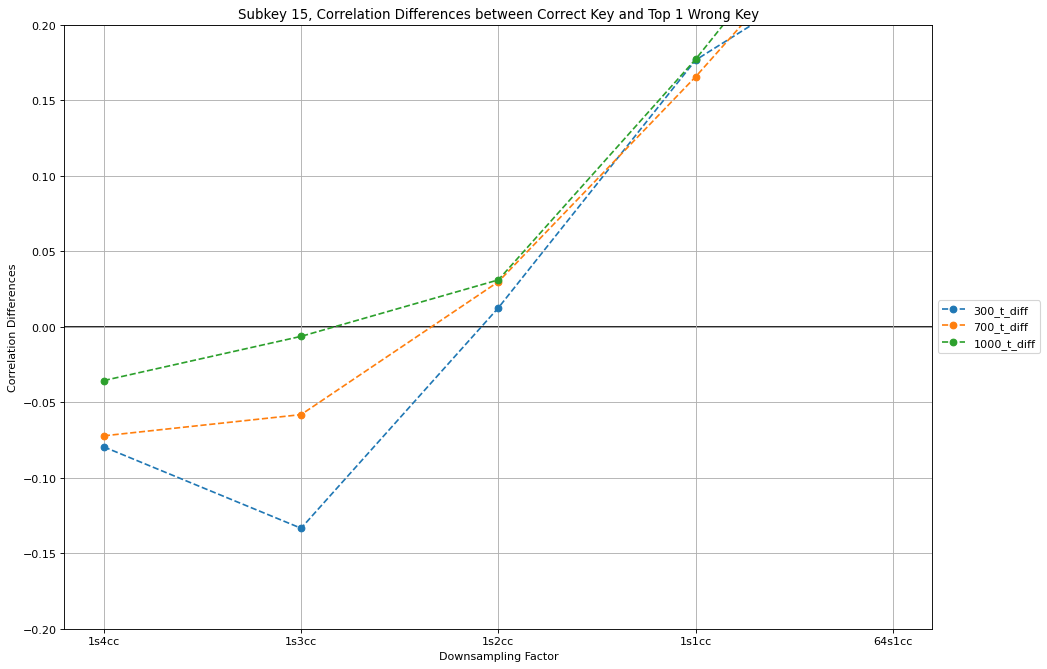

In [17]:
for subkey in range (16):
    
    plt.figure()
    figure(figsize=(14, 10), dpi=80)

    plt.axhline(y=0, color='black', linestyle='-',zorder = 0,)

    for i in (5,13,19):
        y = all_byte_subset_plot[subkey][i] - noise_byte_subset_plot[subkey][i] 
        plt.plot(x, y,'o--',label='%2d_t_diff'%(label_legend[i]))
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.grid()
    plt.ylim((-0.2,0.2))
    plt.xlabel('Downsampling Factor')
    plt.ylabel('Correlation Differences')
    plt.title('Subkey %2d, Correlation Differences between Correct Key and Top 1 Wrong Key'%(subkey))
        
    #plt.savefig('Subkey %2d corr.jpg'%(subkey),dpi=300)

    plt.show()

<Figure size 432x288 with 0 Axes>

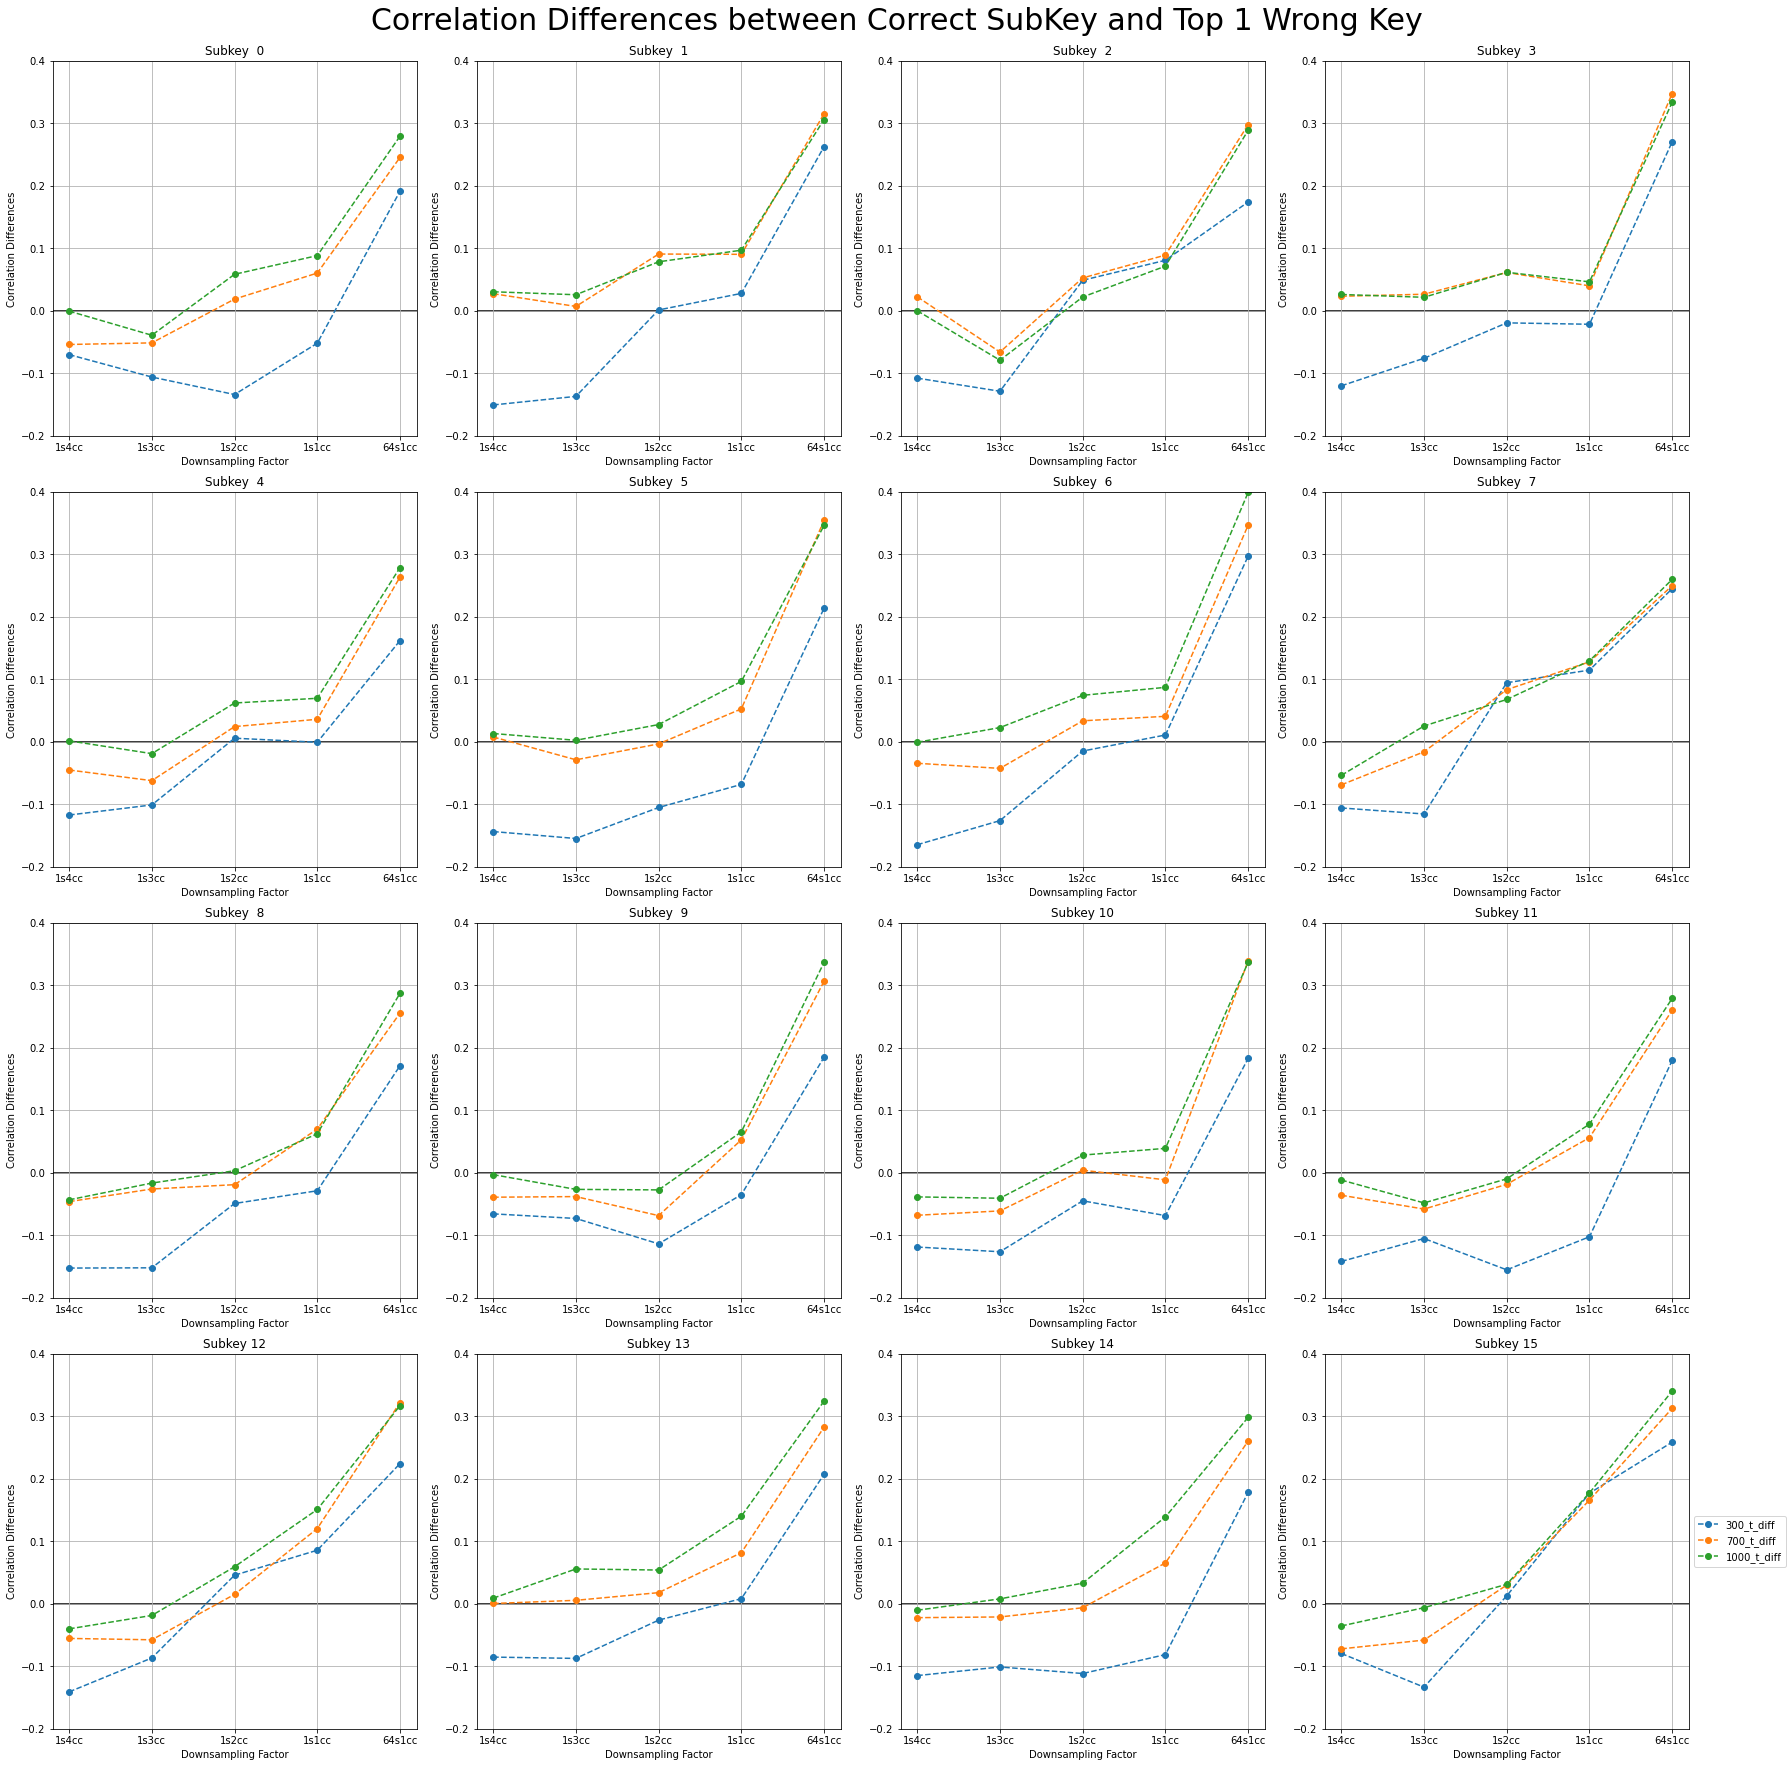

In [20]:
import pylab
plt.figure()
f, axs = plt.subplots(4,4,figsize=(25,25))

value = 1

for subkey in range (16):
    pylab.subplot(4,4,value)

    plt.axhline(y=0, color='black', linestyle='-',zorder = 0,)

    for i in (5,13,19):
        y = all_byte_subset_plot[subkey][i] - noise_byte_subset_plot[subkey][i] 
        plt.plot(x, y,'o--',label='%2d_t_diff'%(label_legend[i]))
        
    value += 1

    plt.grid()
    plt.xticks(x)
    plt.ylim((-0.2,0.4))
    plt.xlabel('Downsampling Factor')
    plt.ylabel('Correlation Differences')
    plt.title('Subkey %2d'%(subkey))
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Correlation Differences between Correct SubKey and Top 1 Wrong Key', size=30)

plt.savefig('all subkeys corr.jpg',dpi=300)

plt.show()

# only plot the correct corr

<Figure size 432x288 with 0 Axes>

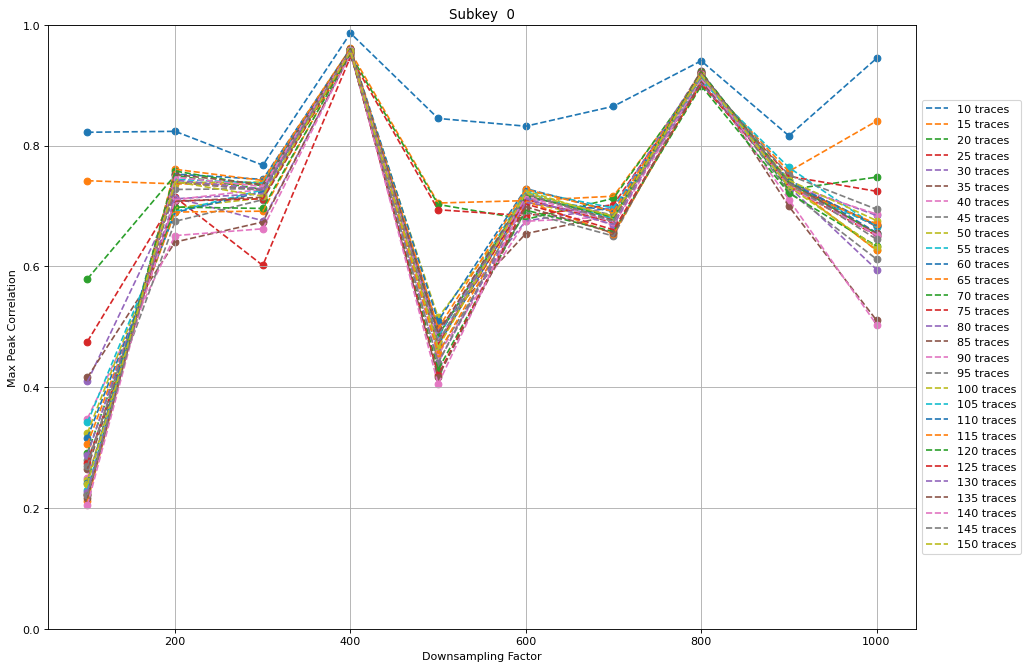

<Figure size 432x288 with 0 Axes>

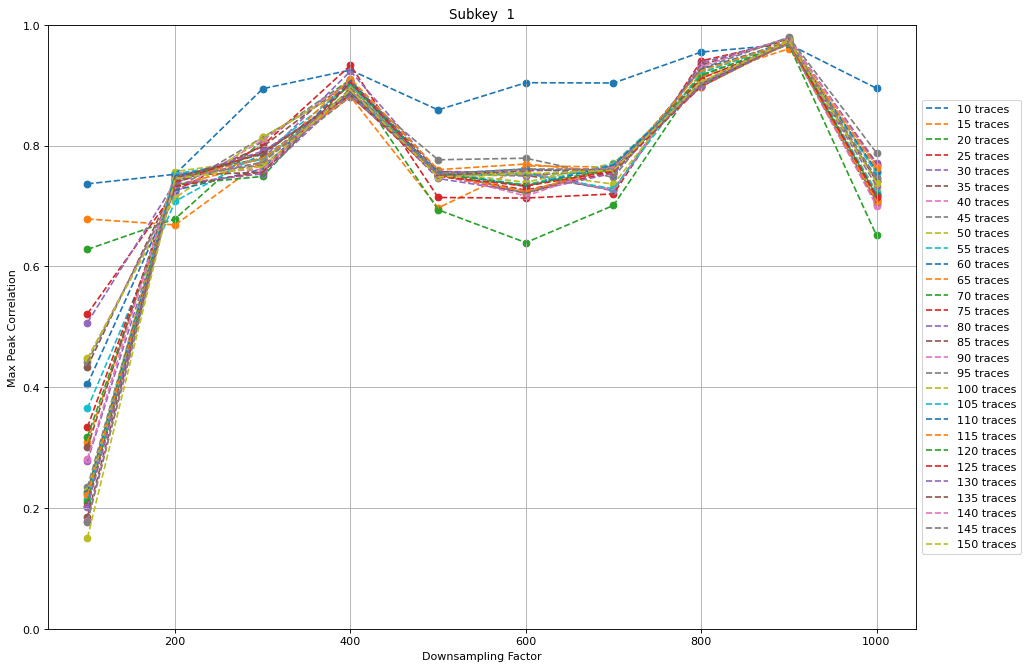

<Figure size 432x288 with 0 Axes>

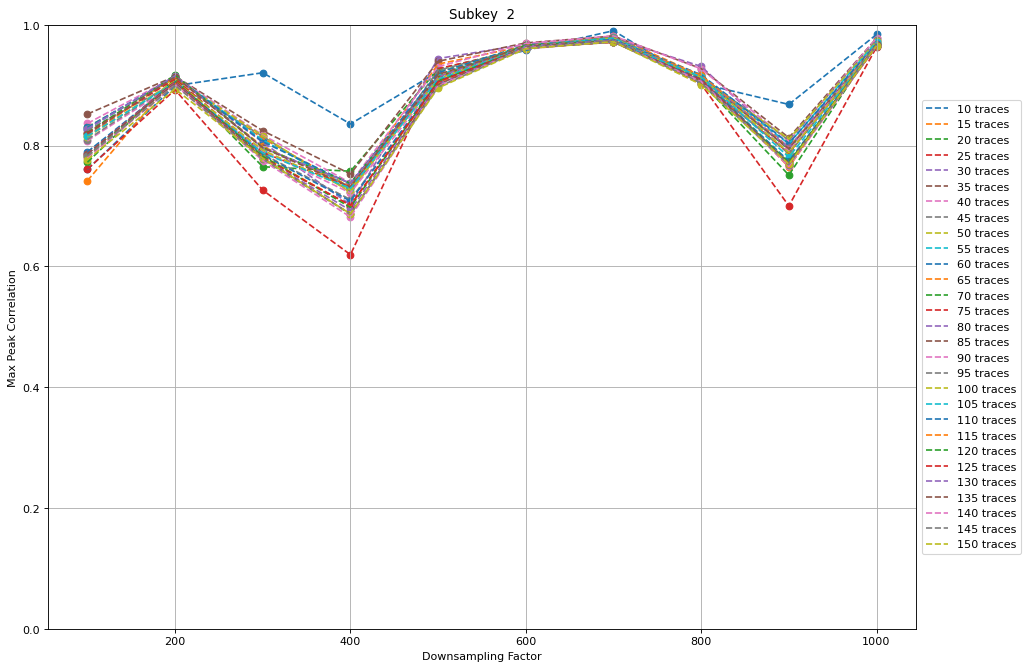

<Figure size 432x288 with 0 Axes>

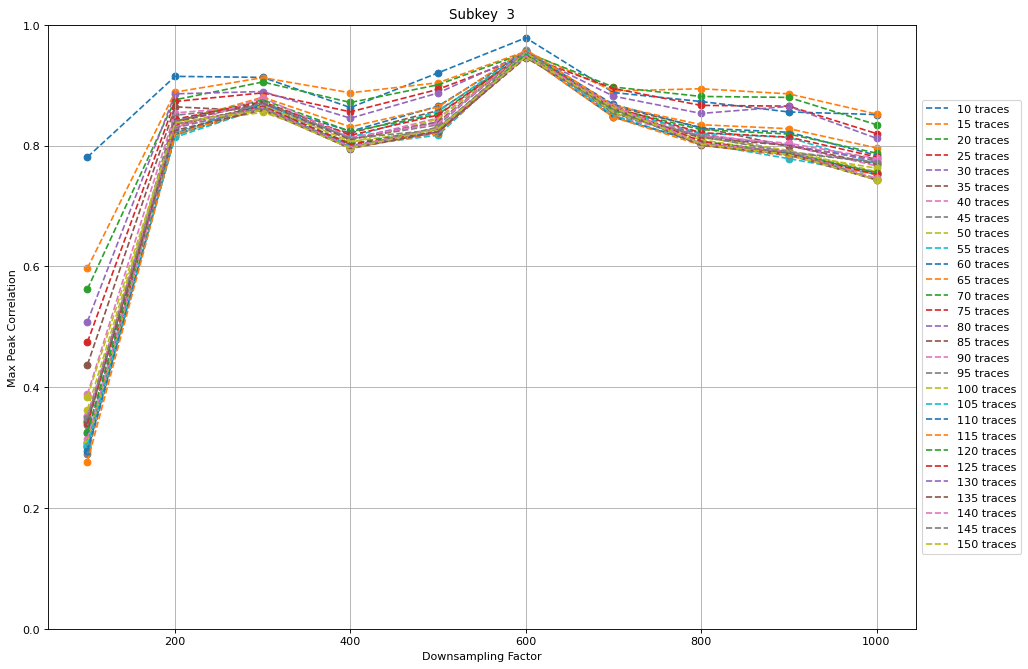

<Figure size 432x288 with 0 Axes>

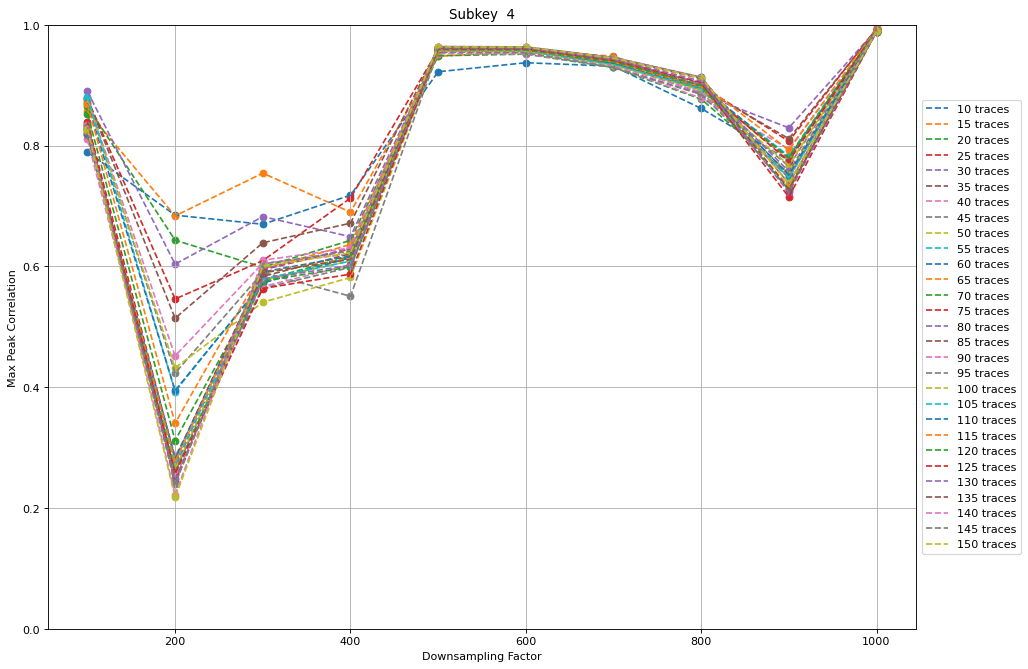

<Figure size 432x288 with 0 Axes>

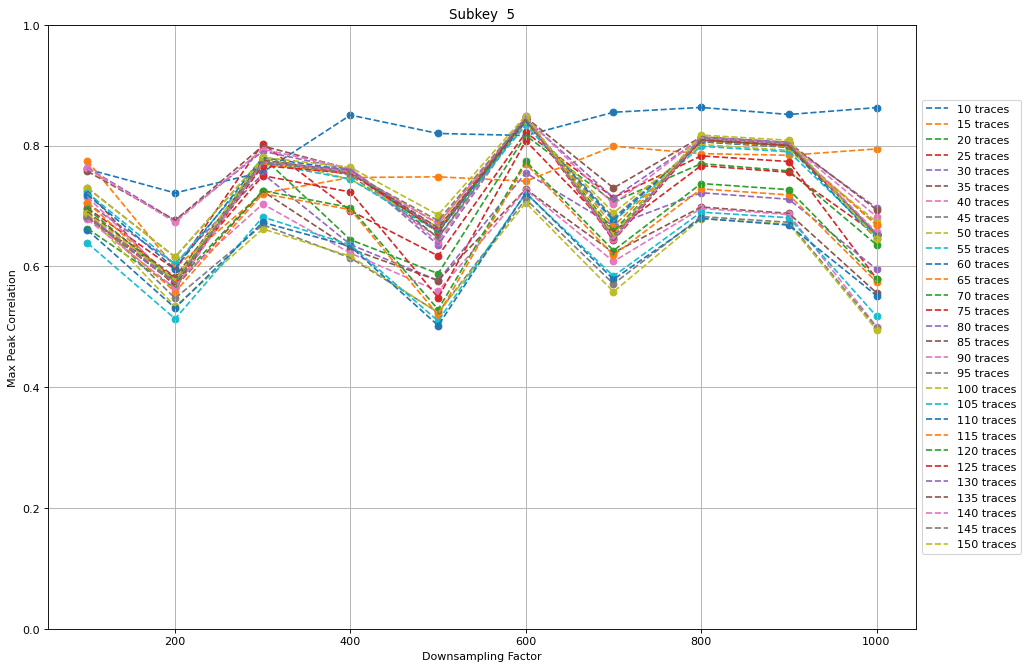

<Figure size 432x288 with 0 Axes>

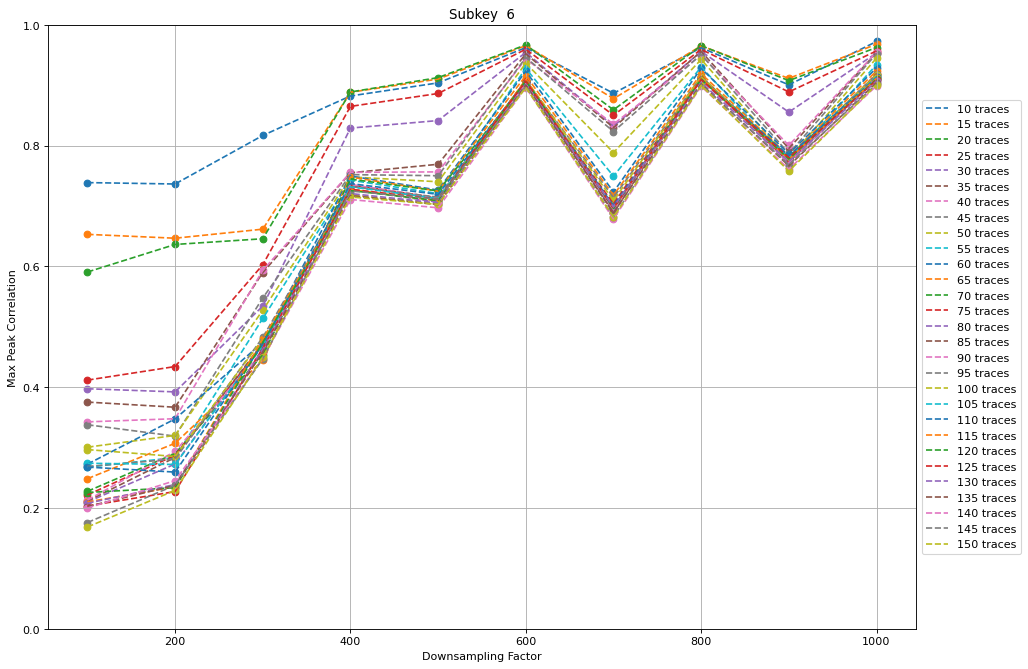

<Figure size 432x288 with 0 Axes>

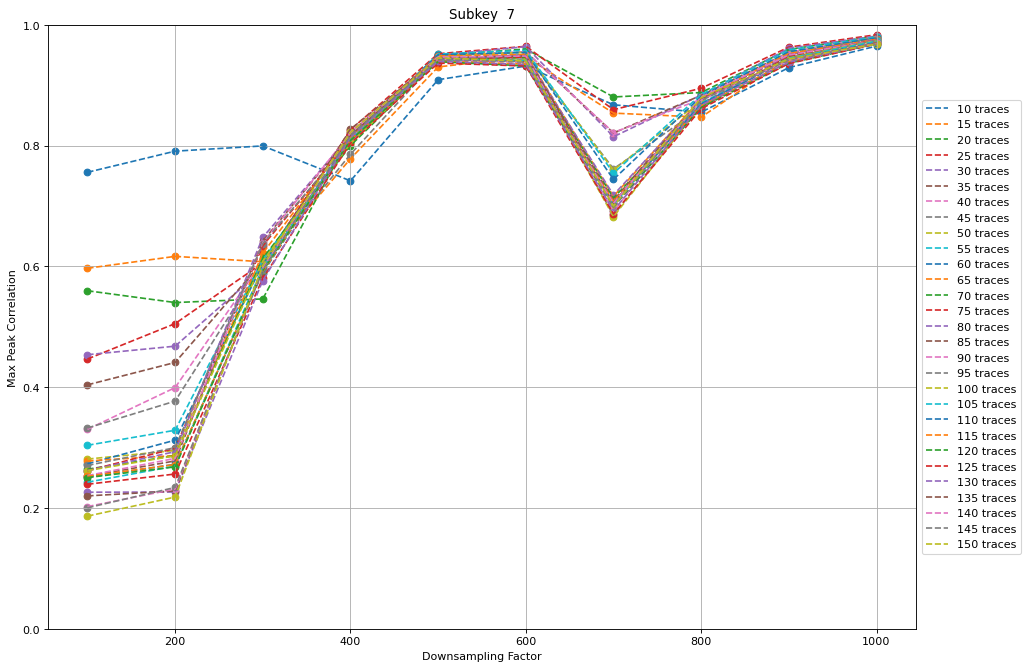

<Figure size 432x288 with 0 Axes>

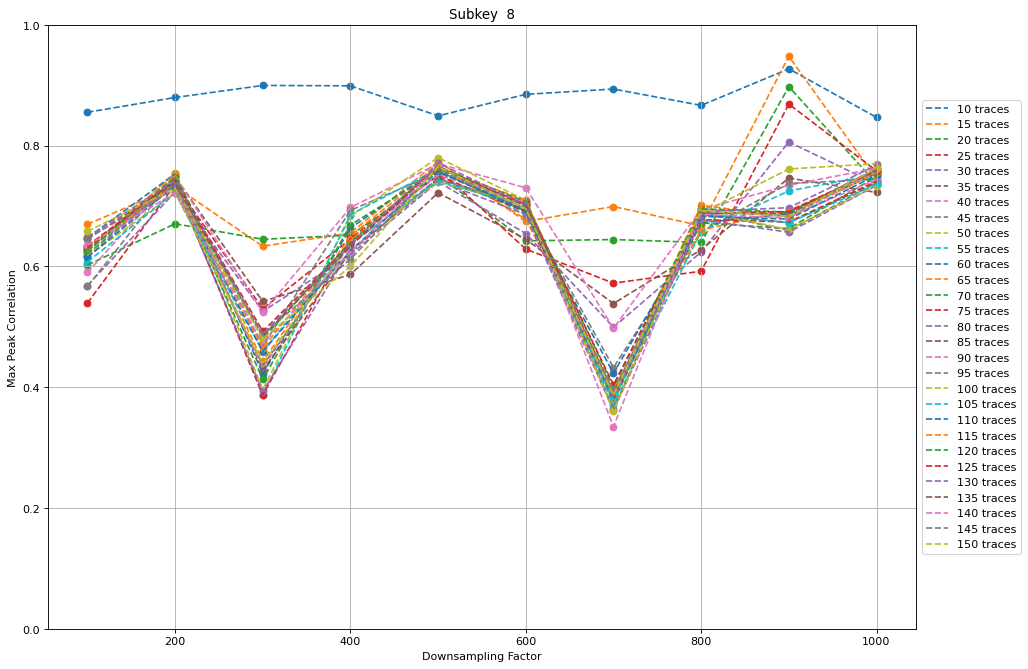

<Figure size 432x288 with 0 Axes>

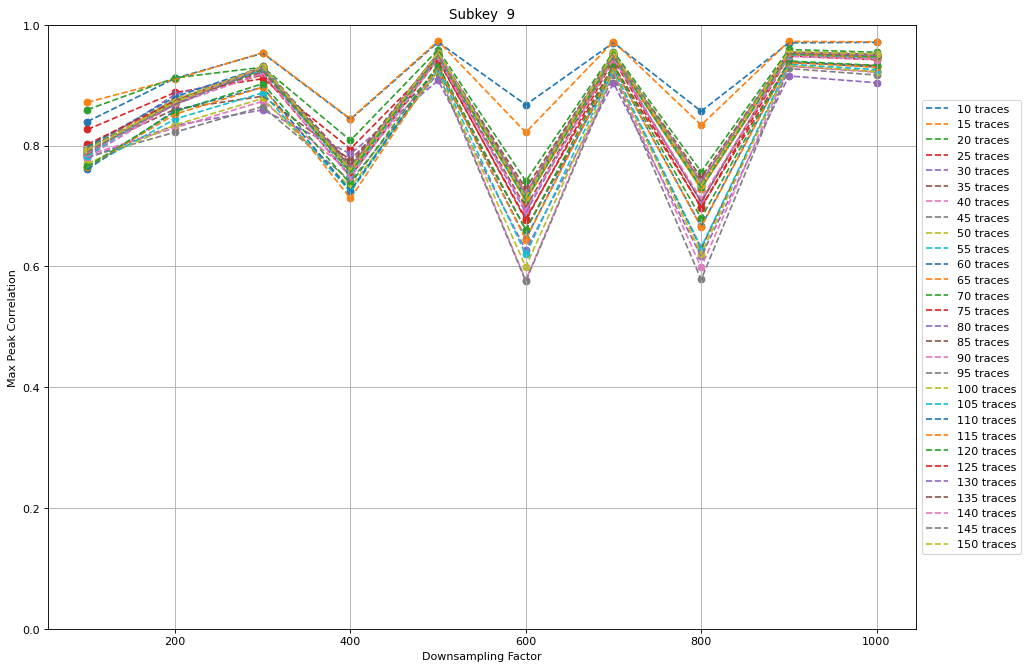

<Figure size 432x288 with 0 Axes>

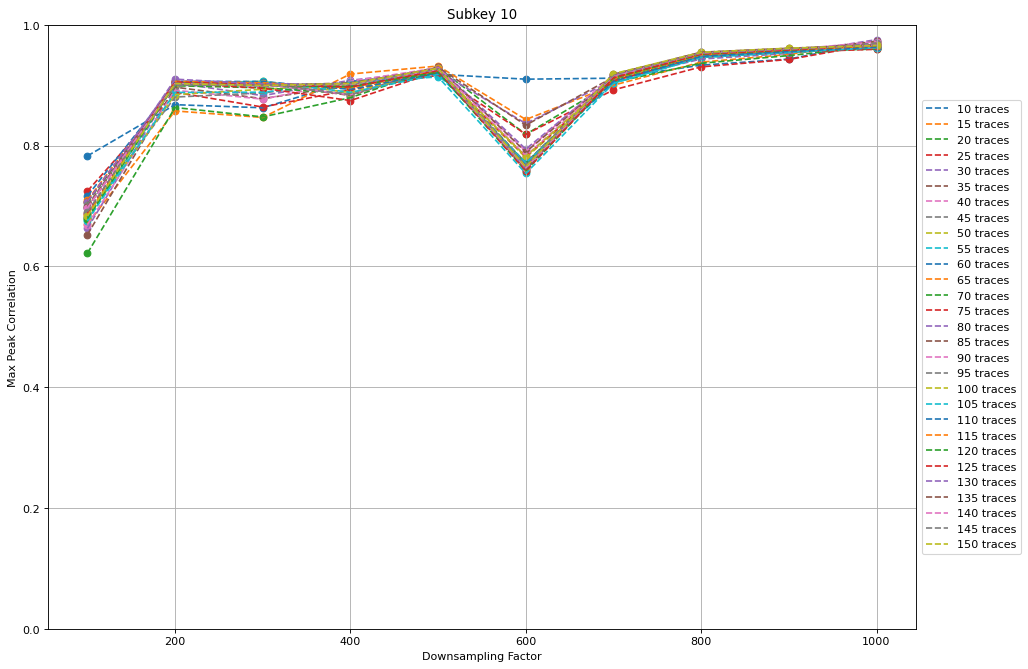

<Figure size 432x288 with 0 Axes>

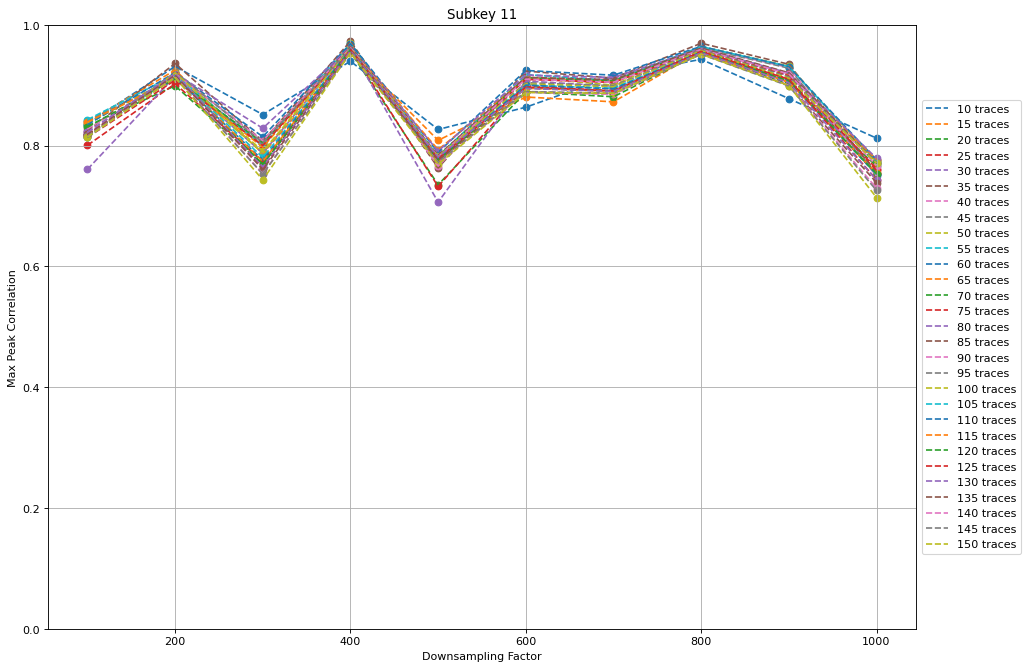

<Figure size 432x288 with 0 Axes>

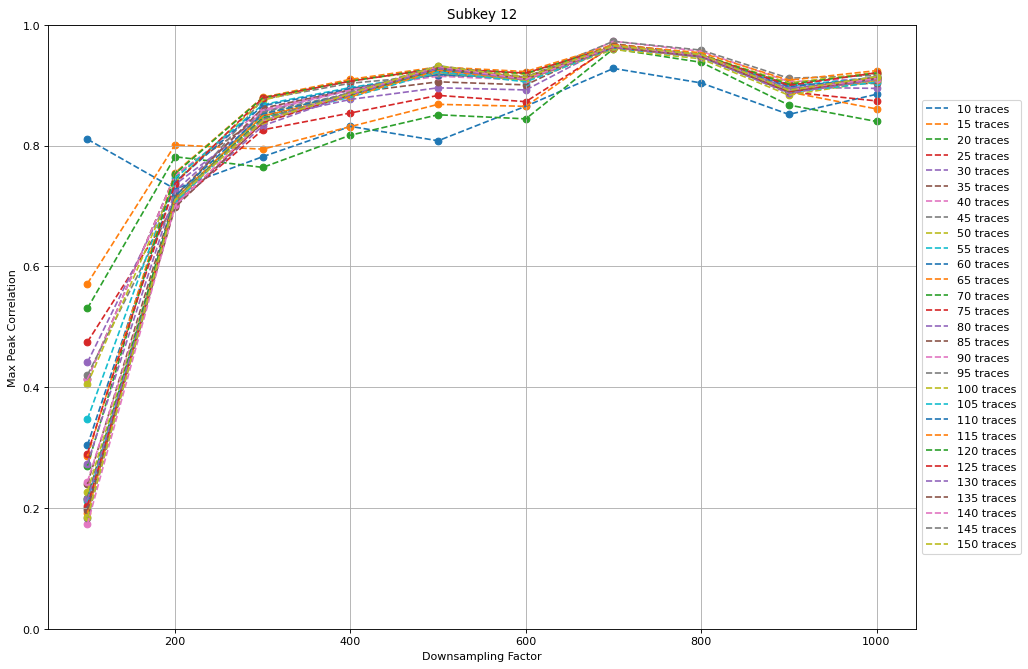

<Figure size 432x288 with 0 Axes>

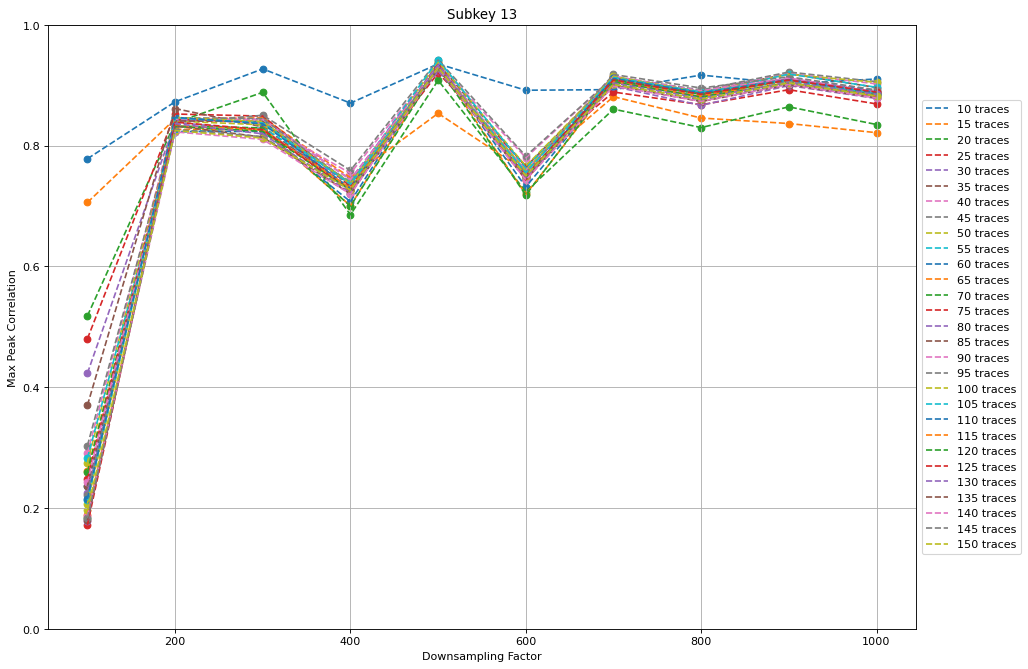

<Figure size 432x288 with 0 Axes>

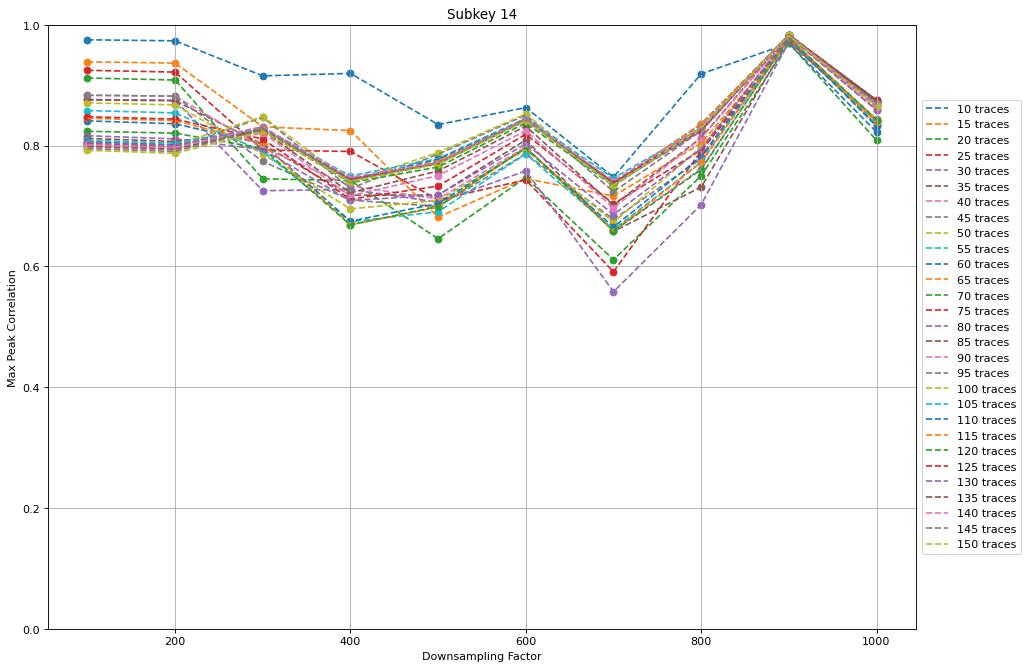

<Figure size 432x288 with 0 Axes>

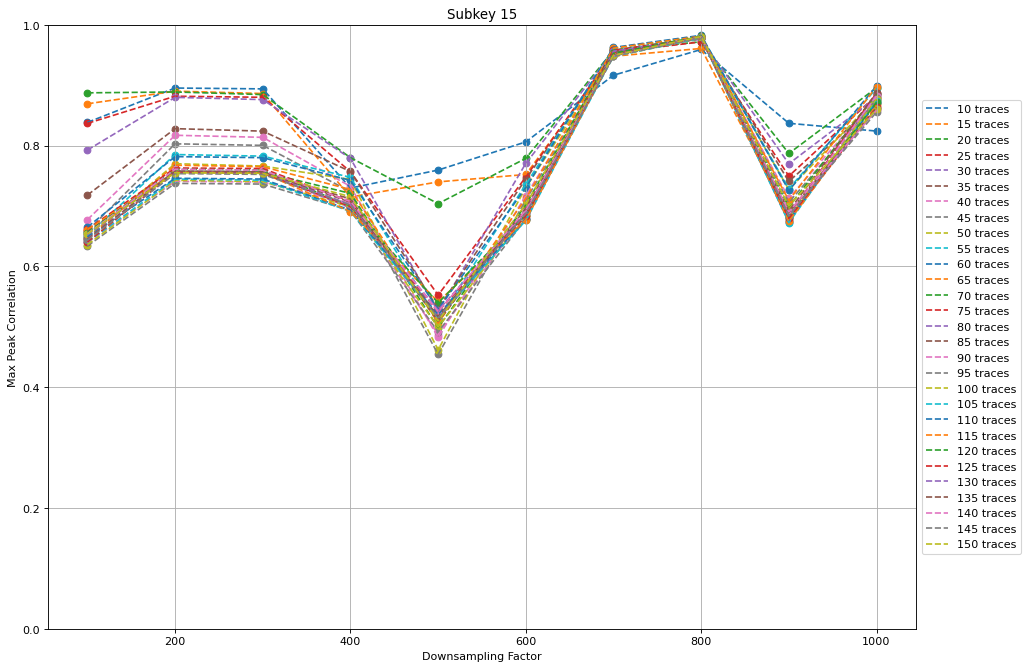

In [157]:
from matplotlib.pyplot import figure
label_legend = np.arange(10, 155, 5)
x = np.arange(100, 1100, 100)

for subkey in range (16):
    
    plt.figure()
    figure(figsize=(14, 10), dpi=80)
    for i in range (len(all_byte_subset_plot[0])):
        y = all_byte_subset_plot[subkey][i] 
        plt.grid()
        plt.scatter(x,y) 
        plt.plot(x, y,'--',label='%2d traces'%(label_legend[i]))
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.ylim((0,1))
        #plt.xlim((80,1020))

    plt.xlabel('Downsampling Factor')
    plt.ylabel('Max Peak Correlation')
    plt.title('Subkey %2d' %(subkey))
    
    #plt.savefig('Subkey %2d corr.jpg'%(subkey),dpi=300)

    plt.show()

<Figure size 432x288 with 0 Axes>

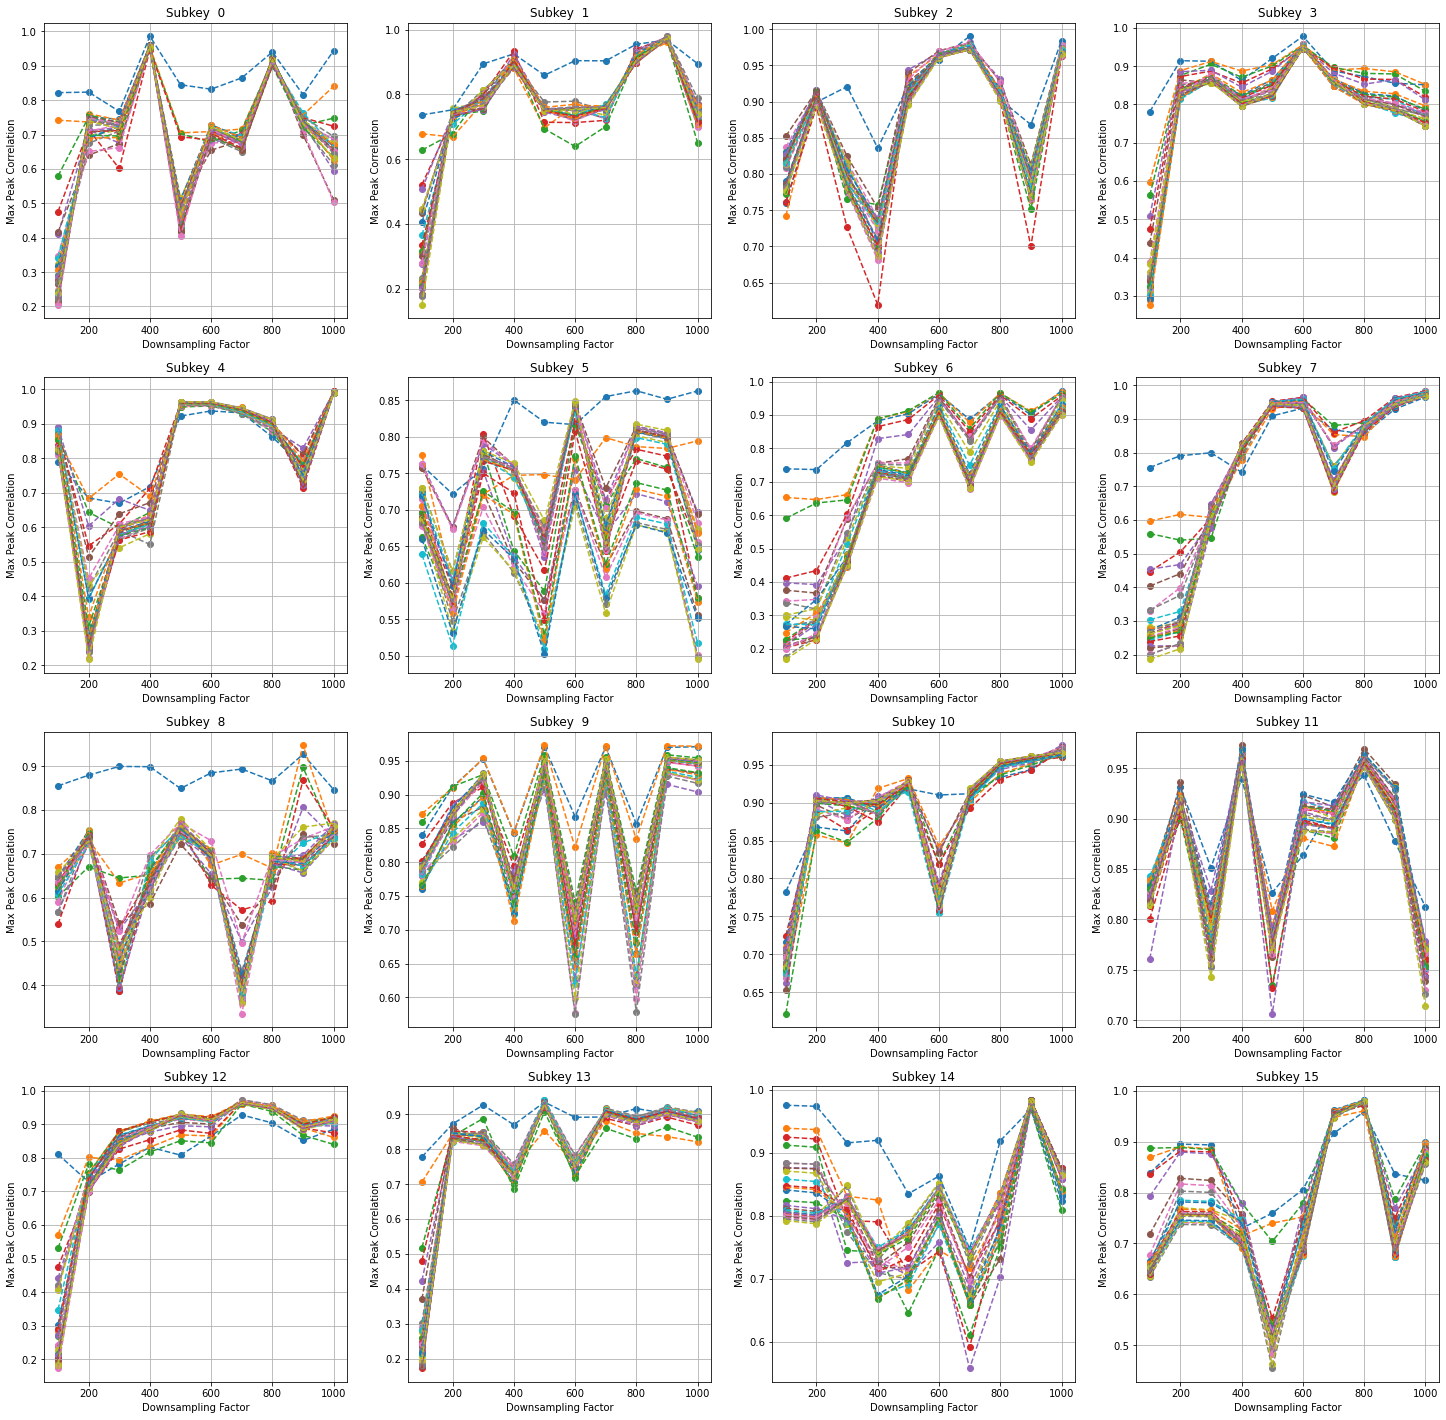

In [149]:
import pylab
plt.figure()
f, axs = plt.subplots(4,4,figsize=(25,25))
value = 1
subset = 0
for subkey in range (16):
    pylab.subplot(4,4,value)
    
    for i in range (len(all_byte_subset_plot[0])):
        y = all_byte_subset_plot[subkey][i] 
        plt.grid()
        plt.scatter(x,y) 
        plt.plot(x, y,'--',label=label_legend[i])

    value += 1
    
    plt.title('Subkey %2d' %(subkey))
    plt.xlabel('Downsampling Factor')
    plt.ylabel('Max Peak Correlation')
    
plt.savefig('all subkeys corr.jpg',dpi=300)

plt.show()